# Module 1 Project

Please fill out:
* Student name: Jennifer Wadkins
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


## Project Overview

    1) Establish business questions to explore
    2) Open, explore, and perform necessary cleaning on provided data sets. Determine need for additional data and acquire it via API calls and web scraping. Decide on most robust data to use as the "master" set.
    3) Merge data sets into larger data sets as needed. Clean further until working with robust data.
    4) EDA on data sets including visualizations

## Other preparation work

Recommended to also install the nbextensions "Table of Contents 2" and "Collapsible Headings" for easier navigation through this notebook.

Gitbhub here: https://github.com/ipython-contrib/jupyter_contrib_nbextensions

## Importing our modules

Import our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True) 


C:\Users\thren\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Notebook Functions

In [2]:
# function to convert strings to their simplest letter elements
def string_cleanup(text):
    '''takes in an object, converts to string, and removes all non-word characters'''
    text = str(text)
    result = re.sub(r"[,@\'?\.$%_:â()-]", "", text, flags=re.I)
    result = re.sub(r"\s+"," ", result, flags = re.I)
    return result

In [3]:
# function to convert a list in string format into a true list
def convert_to_list(string):
    '''Takes a string that looks like a list but is actually a string. Turns it into an actual list.'''
    try:
        li = string.lstrip('[')
        li = li.rstrip(']')
        li = li.replace(" ", '')
        li = list(li.split(","))
        li = [int(x) for x in li]
        return li
    except:
        return None

In [4]:
# function to convert the cost/gross object entries into proper numbers that we can use in calculation
def convert_numbers(x):
    '''Takes in a string formatted number that starts with $ and may include commas, and returns that 
    number as a whole integer that can be used in calculations'''
    x = x[1:]
    x = x.replace(',', '')
    x = int(x)
    return x

# Business Exploration Questions

    * Should Microsoft focus on launching a franchise, or focus on single film IPs?
    * Which grade of writer, director and actors will give the best return on investment?
    * Should the company focus on a larger ensemble of lower-cost actors, or a small ensemble of large-name actors, and how does this depend on whether it is a franchise?
    * What audience should the company aim for (based on MPAA rating)?
    * What budget size of movie should the company aim for?
    * What genre should the company aim for?
   

# Data Aquisition and Cleaning

Open, explore, and perform necessary cleaning on data sets. Determine need for additional data and acquire it via API calls and web scraping. Decide on most robust data to use as the "master" set.

## Source 1 - The Movie Database

### Pulling Data from TMDB via API

We're going to pull the specific movie data that we want to use from TMDB using an API key. 

We're accessing the API documentation for TMDB at https://developers.themoviedb.org/3/getting-started/introduction, after registering for an API key.

We can see some interesting data set options with the TMDB API that want to add to our data including:
    * Movie genre list to match up with the tmdb genre-ids (under Genres)
    * Up-to-date movie data set, retrieved with some predetermined data refinement critera
    * A list of the IMDB movie ids, which will be incredibly helpful for us to join this TMDB info with our IMDB info later in the notebook (under Movies -> Get External IDs)

The big workhorse API for TMDB is in "Discover" located at https://developers.themoviedb.org/3/discover/movie-discover

Using this API, we can get back a data set that is, in some ways, be pre-screened. So we are going to determine how we plan to refine/clean our data set right now, and then figure out ways that we can pull data from TMDB that already fits the parameters we want to use, when possible.

Here are the data cleanup steps we are planning for our data set, some of which can be achieved while we grab the data:

    * Drop entries with fewer than 30 votes. Our client is looking for a blockbuster, not a bespoke production.
    * Drop entries with 1.0 or less popularity, for the same reasons as votes
    * Drop entries with no genre specified. We'll want to use the genre to make recommendations.
    * Only movies 2000 or newer. We want a relatively current dataset in order to make proper recommendations.
    * Remove foreign language films, for stronger relevance to our company which will be making movies in English
    
The Discover API lets us pass the following useful parameters to fulfill some of our data refinement goals:
    * primary_release_date.gte lets us include movies that have a primary release date greater or equal than the specified value
    * primary_release_date.lte lets us pass a primary release date lesser than or equal than the specified value. This will keep our scope in 2019 or older for purposes of our case study. We're looking at movie production in a pre-covid world.
    * vote_count.gte lets us filter for movies with a vote count greater than or equal to the specified value
    * with_original_language lets us pull english language films. Our client will be making films in english

This will take care of a few of the things we wanted to clean up in our dataset.
 
We're getting this and other API data in a separate notebook, because we don't want to make these API calls every time we run this notebook! We've pulled the data via the notebook called "tmdb_api_calls" and saved it as a JSON file, and will now import our JSON file here for further processing.

#### !!!!! STOP !!!!! Go to the notebook at tmdb_api_calls.ipynb and run the first section titled "Discover Data Set" now.

Alternatively, load in the provided csv below where we have already done this task.

In [5]:
# opening up our Discover dataset

f = open('api_data/tmdb_movies.json', encoding='utf-8')
discover = json.load(f)

type(discover) # we've loaded our Discover dataset and it's a dictionary

dict

In [6]:
discover.keys() # checking the keys
# we ran our function to paginate in the API and as a result, our keys are each of the 500 calls we made to the api. We'll
# need to go a level lower to hit our data.

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157'

In [7]:
# what does the first level of our dictionary look like?
discover['1']
# This is page 1 of the results

discover['1']['results']
# these are the entries on page 1. We write a loop to iterate through the pages, and concatenate the 
# results onto our dataframe tmdb_discover

[{'popularity': 520.621,
  'vote_count': 12639,
  'video': False,
  'poster_path': '/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg',
  'id': 354912,
  'adult': False,
  'backdrop_path': '/askg3SMvhqEl4OL52YuvdtY40Yb.jpg',
  'original_language': 'en',
  'original_title': 'Coco',
  'genre_ids': [16, 10751, 35, 12, 14, 10402],
  'title': 'Coco',
  'vote_average': 8.2,
  'overview': "Despite his family’s baffling generations-old ban on music, Miguel dreams of becoming an accomplished musician like his idol, Ernesto de la Cruz. Desperate to prove his talent, Miguel finds himself in the stunning and colorful Land of the Dead following a mysterious chain of events. Along the way, he meets charming trickster Hector, and together, they set off on an extraordinary journey to unlock the real story behind Miguel's family history.",
  'release_date': '2017-10-27'},
 {'popularity': 330.357,
  'vote_count': 15378,
  'video': False,
  'poster_path': '/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg',
  'id': 475557,
  'adult': Fal

In [8]:
tmdb_discover = pd.DataFrame() #start by making an empty dataframe to hold our results

# loop through each page of our response JSON, make it into a dataframe, and concatenate onto our big dataframe
for x in discover:
    df = pd.DataFrame.from_dict(discover[x]['results'])
    tmdb_discover = pd.concat([tmdb_discover, df])

tmdb_discover #finished dataframe

popularity  vote_count  video                       poster_path      id  \
0      520.621       12639  False  /gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg  354912   
1      330.357       15378  False  /udDclJoHjfjb8Ekgsd4FDteOkCU.jpg  475557   
2      288.149        5133  False  /zfE0R94v1E8cuKAerbskfD3VfUt.jpg  474350   
3      257.243        6344  False  /qXsndsv3WOoxszmdlvTWeY688eK.jpg  330457   
4      216.184        4925  False  /jyw8VKYEiM1UDzPB7NsisUgBeJ8.jpg  512200   
..         ...         ...    ...                               ...     ...   
15       4.837          61  False  /aDEsuy1CsQrK2EZLeBRcD9IKIxZ.jpg   16048   
16       4.836          67  False  /2YyasmVeayH4DH0BfaeYsT06D6k.jpg   24959   
17       4.830          72  False  /kXBvc3wkK33ibj9HK7pF9X0Uiwe.jpg  127144   
18       4.830          40  False  /tLwDdvsgQecx6SopQM9XEp8J1fY.jpg   41488   
19       4.821          55  False  /iL6ywWaKHjLV6I5YUs3TQzSFFJg.jpg  279661   

    adult                     backdrop_path original_language  \
0   False  /askg3SMvhqEl4OL52YuvdtY40Yb.jpg                en   
1   False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg                en   
2   False  /8moTOzunF7p40oR5XhlDvJckOSW.jpg                en   
3   False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg                en   
4   False  /zTxHf9iIOCqRbxvl8W5QYKrsMLq.jpg                en   
..    ...                               ...               ...   
15  False                              None                en   
16  False                              None                en   
17  False  /emsrOarrzzjrPIJPpp53jzxqk3w.jpg                en   
18  False  /af1veNOoA5Mkxxh3EEOGoKdcWwF.jpg                en   
19  False                              None                en   

             original_title                       genre_ids  \
0                      Coco  [16, 10751, 35, 12, 14, 10402]   
1                     Joker                    [80, 53, 18]   
2            It Chapter Two                        [27, 14]   
3                 Frozen II         [16, 10751, 12, 35, 14]   
4   Jumanji: The Next Level                    [12, 35, 14]   
..                      ...                             ...   
15           All About Anna                 [35, 18, 10749]   
16                  Program                       [16, 878]   
17  Don't Hug Me I'm Scared                    [27, 14, 16]   
18            The Statement                        [18, 53]   
19           Killer Legends                [80, 99, 36, 27]   

                      title  vote_average  \
0                      Coco           8.2   
1                     Joker           8.2   
2            It Chapter Two           6.9   
3                 Frozen II           7.3   
4   Jumanji: The Next Level           7.0   
..                      ...           ...   
15           All About Anna           3.2   
16                  Program           6.9   
17  Don't Hug Me I'm Scared           7.5   
18            The Statement           5.7   
19           Killer Legends           5.8   

                                             overview release_date  
0   Despite his family’s baffling generations-old ...   2017-10-27  
1   During the 1980s, a failed stand-up comedian i...   2019-10-02  
2   27 years after overcoming the malevolent super...   2019-09-04  
3   Elsa, Anna, Kristoff and Olaf head far into th...   2019-11-20  
4   As the gang return to Jumanji to rescue one of...   2019-12-04  
..                                                ...          ...  
15  Anna is a young costume designer, focused on h...   2005-11-24  
16  Cis and Duo discuss leaving the real world whi...   2003-02-07  
17  A disturbing puppet short exploring the concep...   2011-07-25  
18  The film is set in France in the 1990s, the Fr...   2003-12-12  
19  Delving into our collective nightmares, this h...   2014-07-01  

[10000 rows x 14 columns]

By pre-filtering for year 2000 or later, 31+ votes, and english language films, we hit the 10,000 results limit with the TMDB API. However we can see that the default sort on this data set is via popularity, so we will conclude that we have gotten the 10,000 most popular movies since 2000, and be happy with the quality of this data.

### Exploring the Data

When performing cleaning analysis on ALL datasets in this project, we initially want to know things like:

    * What is the shape of our imported data?
    * How many data entries?
    * What format is the data in?
    * How can we remove the most obvious redundancies (columns we just don't need, etc)
    * Are there missing/null values in the dataset that will need to be removed or imputed?

In [9]:
tmdb_discover.shape
# we have 10,000 entries

(10000, 14)

In [10]:
tmdb_discover.dtypes
# we'll take a look at fixing the release_date format and converting that to a proper datetime. Everything else looks correct.

popularity           float64
vote_count             int64
video                   bool
poster_path           object
id                     int64
adult                   bool
backdrop_path         object
original_language     object
original_title        object
genre_ids             object
title                 object
vote_average         float64
overview              object
release_date          object
dtype: object

In [11]:
tmdb_discover.describe()
# we can see that we have meaningful data with a reasonable vote_count per entry and high popularity

popularity   vote_count             id  vote_average
count  10000.000000  10000.00000   10000.000000  10000.000000
mean      16.046719    877.56510  182247.233400      6.119470
std       16.794699   2058.38094  181421.224833      0.943012
min        4.821000     31.00000      12.000000      1.500000
25%        8.810000     60.00000   17027.750000      5.500000
50%       11.624500    155.00000   91040.000000      6.200000
75%       16.853500    653.00000  339445.750000      6.800000
max      520.621000  27507.00000  704264.000000      9.000000

In [12]:
tmdb_discover[(tmdb_discover['genre_ids'] == '[]')].count()
# All of our entries have genre ids, so nothing we need to drop.

popularity           0
vote_count           0
video                0
poster_path          0
id                   0
adult                0
backdrop_path        0
original_language    0
original_title       0
genre_ids            0
title                0
vote_average         0
overview             0
release_date         0
dtype: int64

In [13]:
tmdb_discover.isnull().sum()
# we have no null or missing values in our dataset in the columns we need to use

popularity             0
vote_count             0
video                  0
poster_path           13
id                     0
adult                  0
backdrop_path        989
original_language      0
original_title         0
genre_ids              0
title                  0
vote_average           0
overview               0
release_date           0
dtype: int64

### Data Cleanup

What do we actually need to use from this data set?

We'll be using this data set as the basis for all further connections in this project, as the TMDB API allowed us to gather both the most up-to-date information as well as provides us with important details such as a specific release date and genres.

We're going to do the following work on this dataset to clean it up:
    
    a) change our release date to standard format
    b) Drop unneeded columns
        * video - we know all of these values are false, as it was part of our API parameters
        * poster_path - provides a path to an image for the movie, which we don't need
        * adult - we know all of these values are false, as it was part of our API parameters
        * backdrop_path - another set of images, which we don't need
        * original_titles - the original language title; we only need the english titles
        * overview - summary description of the movie, which we cannot use in visualization
        * original_language - we're only using english language movies, so this is a redundant field


In [14]:
tmdb_discover.columns
# show column names so I can see what to drop in the next section of code

Index(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult',
       'backdrop_path', 'original_language', 'original_title', 'genre_ids',
       'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [15]:
#drop unneeded columns by name
tmdb_discover.drop(columns=['video', 'poster_path', 'adult', 'backdrop_path', 'original_title', 'overview', 'original_language'], inplace=True)

In [16]:
# using pandas datetime converter to change our release date column to standard format
tmdb_discover['release_date'] = pd.to_datetime(tmdb_discover['release_date'])

In [17]:
tmdb_discover.dtypes

popularity             float64
vote_count               int64
id                       int64
genre_ids               object
title                   object
vote_average           float64
release_date    datetime64[ns]
dtype: object

In [18]:
tmdb_discover # confirming that we have cleaned up our data and have only the information we need to use

popularity  vote_count      id                       genre_ids  \
0      520.621       12639  354912  [16, 10751, 35, 12, 14, 10402]   
1      330.357       15378  475557                    [80, 53, 18]   
2      288.149        5133  474350                        [27, 14]   
3      257.243        6344  330457         [16, 10751, 12, 35, 14]   
4      216.184        4925  512200                    [12, 35, 14]   
..         ...         ...     ...                             ...   
15       4.837          61   16048                 [35, 18, 10749]   
16       4.836          67   24959                       [16, 878]   
17       4.830          72  127144                    [27, 14, 16]   
18       4.830          40   41488                        [18, 53]   
19       4.821          55  279661                [80, 99, 36, 27]   

                      title  vote_average release_date  
0                      Coco           8.2   2017-10-27  
1                     Joker           8.2   2019-10-02  
2            It Chapter Two           6.9   2019-09-04  
3                 Frozen II           7.3   2019-11-20  
4   Jumanji: The Next Level           7.0   2019-12-04  
..                      ...           ...          ...  
15           All About Anna           3.2   2005-11-24  
16                  Program           6.9   2003-02-07  
17  Don't Hug Me I'm Scared           7.5   2011-07-25  
18            The Statement           5.7   2003-12-12  
19           Killer Legends           5.8   2014-07-01  

[10000 rows x 7 columns]

We need this data set in order to make our API calls for the IMDB ID matchup, so we're going to export it to a csv that we can then import into our API production file.

In [19]:
# Exporting our csv so that we can make our API calls to match up IMDB ID
#tmdb_discover.to_csv('api_data/tmdb_discover.csv', index=False)

### IMDB ID Matchup

Our next goal is to match up IMDB movie ids for each of the movie ids in our data set. TMDB has an API to do exactly this - submit the TMDB id, and get an IMDB id in return. Each TMDB movie id is a parameter that must be passed to an individual API call.

We move to the tmdb_api_calls notebook to do this process.

We've exported our Discover Data Set up above and will process it in our API notebook, and will then re-import it here with our TMDB ids replaced with IMDB ids!

#### !!! STOP !!! Go to the API notebook tmdb_api_calls.ipynb and run the second section titled "IMDB ID Matchup" now.
Alternatively, load in the provided csv below where we have already done this task.

In [20]:
tmdb_discover = pd.read_csv('api_data/tmdb_discover_converted.csv')

tmdb_discover.sort_values('id')
# we now have our original tmdb_discover dataset converted to IMDB ids instead of TMDB ids.
# We'll be able to cross reference this set later on with IMDB datasets.

popularity  vote_count         id              genre_ids  \
5292      11.247         920  tt0035423        [35, 14, 10749]   
7578       8.725         106  tt0069049               [35, 18]   
5740      10.757          93  tt0118589            [18, 10749]   
8438       7.791          36  tt0118926    [80, 18, 10749, 53]   
7842       8.418          48  tt0119004                   [18]   
...          ...         ...        ...                    ...   
122       74.998          35  tt9896916               [12, 16]   
717       33.075         400        NaN               [28, 35]   
4532      12.272         141        NaN      [28, 16, 14, 878]   
5226      11.321         147        NaN  [16, 28, 878, 12, 14]   
5485      11.022          79        NaN               [14, 12]   

                               title  vote_average release_date  
5292                  Kate & Leopold           6.2   2001-12-25  
7578      The Other Side of the Wind           6.8   2018-11-02  
5740                         Glitter           4.4   2001-09-21  
8438             The Dancer Upstairs           6.6   2002-09-20  
7842                      Don's Plum           5.7   2001-02-10  
...                              ...           ...          ...  
122           The Pilgrim's Progress           7.6   2019-04-18  
717             Once Upon a Deadpool           6.9   2018-12-11  
4532                   Hulk vs. Thor           6.6   2009-01-27  
5226              Hulk vs. Wolverine           6.9   2009-01-27  
5485  H2O Just Add Water - The Movie           6.3   2008-01-01  

[10000 rows x 7 columns]

In [21]:
tmdb_discover['id'].notna().sum() #checking for missing IMDB IDs
# We didn't find four IMDB IDs

9996

In [22]:
# Dropping the four missing IDs
tmdb_discover.dropna(subset=['id'], inplace=True)

In [23]:
# We hope to use the titles to match up to some other data later, 
# so we use the string cleanup function to remove all special characters from the titles

tmdb_discover['title'] = tmdb_discover['title'].map(lambda x: string_cleanup(x))

In [24]:
#Now that we have replaced our TMDB id with IMDB id, we'll set the IMDB id as our index
tmdb_discover.set_index('id', inplace=True)

In [25]:
# check our data types
tmdb_discover.dtypes

popularity      float64
vote_count        int64
genre_ids        object
title            object
vote_average    float64
release_date     object
dtype: object

In [26]:
# looks like the datetime type does not persist across exports and imports.
# We'll use the pandas built-in datetime converter to change our release date column to standard format (again)
tmdb_discover['release_date'] = pd.to_datetime(tmdb_discover['release_date'])

In [27]:
# Converting our genre_ids string (which LOOK like lists) into actual lists of integers
tmdb_discover['genres'] = tmdb_discover['genre_ids'].map(lambda x: convert_to_list(x))

In [28]:
tmdb_discover

popularity  vote_count                       genre_ids  \
id                                                                  
tt2380307     520.621       12639  [16, 10751, 35, 12, 14, 10402]   
tt7286456     330.357       15378                    [80, 53, 18]   
tt7349950     288.149        5133                        [27, 14]   
tt4520988     257.243        6344         [16, 10751, 12, 35, 14]   
tt7975244     216.184        4925                    [12, 35, 14]   
...               ...         ...                             ...   
tt0349080       4.837          61                 [35, 18, 10749]   
tt0366178       4.836          67                       [16, 878]   
tt2501618       4.830          72                    [27, 14, 16]   
tt0340376       4.830          40                        [18, 53]   
tt3449040       4.821          55                [80, 99, 36, 27]   

                            title  vote_average release_date  \
id                                                             
tt2380307                    Coco           8.2   2017-10-27   
tt7286456                   Joker           8.2   2019-10-02   
tt7349950          It Chapter Two           6.9   2019-09-04   
tt4520988               Frozen II           7.3   2019-11-20   
tt7975244  Jumanji The Next Level           7.0   2019-12-04   
...                           ...           ...          ...   
tt0349080          All About Anna           3.2   2005-11-24   
tt0366178                 Program           6.9   2003-02-07   
tt2501618   Dont Hug Me Im Scared           7.5   2011-07-25   
tt0340376           The Statement           5.7   2003-12-12   
tt3449040          Killer Legends           5.8   2014-07-01   

                                   genres  
id                                         
tt2380307  [16, 10751, 35, 12, 14, 10402]  
tt7286456                    [80, 53, 18]  
tt7349950                        [27, 14]  
tt4520988         [16, 10751, 12, 35, 14]  
tt7975244                    [12, 35, 14]  
...                                   ...  
tt0349080                 [35, 18, 10749]  
tt0366178                       [16, 878]  
tt2501618                    [27, 14, 16]  
tt0340376                        [18, 53]  
tt3449040                [80, 99, 36, 27]  

[9996 rows x 7 columns]

### Export Web Scraper File

We now will export our completed tmdb_discover file in order to use it to scrape Box Office Mojo.

In [29]:
#exporting the dataframe to a csv to use with our web scraper
#tmdb_discover.to_csv('api_data/tmdb_imdb_ids.csv')

### Movie Genres Matchup

TMDB also allows for browser-based API calls, which works well for small simple calls. We used their browser system for this simple call to get the movie genre names to match the TMDB movie genre IDs. We copied the text results into our source code editor Notepad++, and saved as a JSON

We used https://developers.themoviedb.org/3/genres/get-movie-list to get a JSON dictionary of movie genres.

We'll want this list later when we need to identify genre numbers to actual genre names.

In [30]:
# We saved the resulting web-based text return as a JSON using our source code editor, and now we load it
f = open('api_data/tmdb_movie_genres.json')
data = json.load(f)
data

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

In [31]:
# converting our nested dictionary into a mapping dictionary

genres = data['genres']

tmdb_genres = {}

for x in range(len(genres)):
    tmdb_genres[(genres[x]['id'])] = genres[x]['name']

tmdb_genres

{28: 'Action',
 12: 'Adventure',
 16: 'Animation',
 35: 'Comedy',
 80: 'Crime',
 99: 'Documentary',
 18: 'Drama',
 10751: 'Family',
 14: 'Fantasy',
 36: 'History',
 27: 'Horror',
 10402: 'Music',
 9648: 'Mystery',
 10749: 'Romance',
 878: 'Science Fiction',
 10770: 'TV Movie',
 53: 'Thriller',
 10752: 'War',
 37: 'Western'}

## Source 2 - Box Office Mojo

Box Office Mojo is part of IMDB pro and does not offer a personal-use API. We started with our movie data of 10,000 entries from TMDB and used another TMDB API to obtain all of the IMDB IDs for 9,996 movies. Now, we will use our web scraper in our project called bom_scraper.ipynb to use the IMDB ID at Box Office Mojo/IMDB to find MPAA rating, studio, domestic gross, foreign gross and budget information for each movie, if available

#### !!! STOP !!! Go to the notebook bom_scraper.ipynb now and run the web scraper

Alternatively, load in the provided csv where we have already done this task.

### Exploring the Data

In [32]:
#Box Office Mojo movie grosses and IMDB MPAA ratings
bom = pd.read_csv('api_data/tmdb_bom_scraped.csv')

In [33]:
bom

id                               studio rating       budget  \
0     tt2380307  Walt Disney Studios Motion Pictures     PG          NaN   
1     tt7286456                         Warner Bros.      R   55000000.0   
2     tt7349950                         Warner Bros.      R   79000000.0   
3     tt4520988  Walt Disney Studios Motion Pictures     PG  150000000.0   
4     tt7975244    Sony Pictures Entertainment (SPE)  PG-13  125000000.0   
...         ...                                  ...    ...          ...   
9991  tt0349080                                  NaN      0          NaN   
9992  tt0366178                                  NaN      0          NaN   
9993  tt2501618                                  NaN      0          NaN   
9994  tt0340376               Sony Pictures Classics      R   27000000.0   
9995  tt3449040                                  NaN      0          NaN   

        dom_gross   world_gross  
0     210460015.0  8.078179e+08  
1     335451311.0  1.074251e+09  
2     211593228.0  4.730932e+08  
3     477373578.0  1.450027e+09  
4     320314960.0  8.000597e+08  
...           ...           ...  
9991          NaN           NaN  
9992          NaN           NaN  
9993          NaN           NaN  
9994     765637.0  1.079822e+06  
9995          NaN           NaN  

[9996 rows x 6 columns]

In [34]:
# what is the shape of our data?
bom.shape
# this dataset has 9996 movie entries, exactly what we submitted

(9996, 6)

In [35]:
# what kind of data is stored?
bom.dtypes
# Most of this data is stored correctly. We'll be mapping our ratings to numbers, but we do expect to see objects right now

id              object
studio          object
rating          object
budget         float64
dom_gross      float64
world_gross    float64
dtype: object

In [36]:
# do we have any missing/null values?
bom.isnull().sum()
# This dataset is not missing any IMDB IDs. We have some missing data in other categories

id                0
studio         4498
rating            0
budget         7545
dom_gross      4703
world_gross    3267
dtype: int64

### Data Cleanup

We performed some of our data cleanup during our web scrape, but we'll be doing these additional tasks:

    * Map our MPAA rating to a number so we can use this categorical data
    * Set our IMDB ID as the index so we can join on this field later

In [37]:
#We're mapping our MPAA Rating to a number in a new column

ratings_map = {'G': 1, 'PG': 2, 'PG-13': 3, 'R': 4, 'NC-17': 5, 'NR': 6, '0': 0}

bom['rating_id'] = bom['rating'].map(ratings_map)

In [38]:
# no missing ratings

bom['rating_id'].isnull().sum()

0

In [39]:
# set IMDB id as the index

bom.set_index('id', inplace=True)

In [40]:
# Our rating_id is an integer field, as desired

bom.dtypes

studio          object
rating          object
budget         float64
dom_gross      float64
world_gross    float64
rating_id        int64
dtype: object

In [41]:
bom

studio rating       budget  \
id                                                                   
tt2380307  Walt Disney Studios Motion Pictures     PG          NaN   
tt7286456                         Warner Bros.      R   55000000.0   
tt7349950                         Warner Bros.      R   79000000.0   
tt4520988  Walt Disney Studios Motion Pictures     PG  150000000.0   
tt7975244    Sony Pictures Entertainment (SPE)  PG-13  125000000.0   
...                                        ...    ...          ...   
tt0349080                                  NaN      0          NaN   
tt0366178                                  NaN      0          NaN   
tt2501618                                  NaN      0          NaN   
tt0340376               Sony Pictures Classics      R   27000000.0   
tt3449040                                  NaN      0          NaN   

             dom_gross   world_gross  rating_id  
id                                               
tt2380307  210460015.0  8.078179e+08          2  
tt7286456  335451311.0  1.074251e+09          4  
tt7349950  211593228.0  4.730932e+08          4  
tt4520988  477373578.0  1.450027e+09          2  
tt7975244  320314960.0  8.000597e+08          3  
...                ...           ...        ...  
tt0349080          NaN           NaN          0  
tt0366178          NaN           NaN          0  
tt2501618          NaN           NaN          0  
tt0340376     765637.0  1.079822e+06          4  
tt3449040          NaN           NaN          0  

[9996 rows x 6 columns]

## Source 3 - IMDB
   
While we do our exploration and cleanup analysis on each of these IMDB data sets, we'll explore how they will interact with each other when we merge them. We'll determine what needs to be cleaned before vs after merging the datasets.

### IMDB1 - User user_ratings per movie ID

In [42]:
# import imdb user user_ratings per movie
imdb1 = pd.read_csv('zippedData/title.ratings.csv')

#### Exploring the Data

In [43]:
# taking a look at what we've imported
imdb1
# this dataset is using the movie id and showing the average user_rating, and the number of votes
# this dataset has 73,856 movie entries

tconst  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]

In [44]:
# what kind of data is stored?
imdb1.dtypes
# The data in this set appears to be stored in the proper formats

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [45]:
# do we have any missing/null values?
imdb1.isnull().sum()
# This dataset has no missing values. That doesn't mean there aren't categorical placeholders, and we will look into that further

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [46]:
round(imdb1.describe(), 2)

averagerating    numvotes
count       73856.00    73856.00
mean            6.33     3523.66
std             1.47    30294.02
min             1.00        5.00
25%             5.50       14.00
50%             6.50       49.00
75%             7.40      282.00
max            10.00  1841066.00

#### Data Cleanup

In [47]:
#We make the unique IMDB ID "tconst" into our index. We'll be joining on this id for many of our data sets.
imdb1.set_index('tconst', inplace=True)

In [48]:
imdb1

averagerating  numvotes
tconst                             
tt10356526            8.3        31
tt10384606            8.9       559
tt1042974             6.4        20
tt1043726             4.2     50352
tt1060240             6.5        21
...                   ...       ...
tt9805820             8.1        25
tt9844256             7.5        24
tt9851050             4.7        14
tt9886934             7.0         5
tt9894098             6.3       128

[73856 rows x 2 columns]

### IMDB2 - Cast and crew per movie ID

In [49]:
# import imdb primary cast and crew per movie
imdb2 = pd.read_csv('zippedData/title.principals.csv')

#### Exploring the Data

In [50]:
# taking a look at what we've imported
imdb2
# this dataset is using the movie id and showing the principal cast and crew for each movie, by the cast/crew id
# this dataset has 1,028,186 cast and crew entries

tconst  ordering      nconst  category       job  \
0        tt0111414         1   nm0246005     actor       NaN   
1        tt0111414         2   nm0398271  director       NaN   
2        tt0111414         3   nm3739909  producer  producer   
3        tt0323808        10   nm0059247    editor       NaN   
4        tt0323808         1   nm3579312   actress       NaN   
...            ...       ...         ...       ...       ...   
1028181  tt9692684         1   nm0186469     actor       NaN   
1028182  tt9692684         2   nm4929530      self       NaN   
1028183  tt9692684         3  nm10441594  director       NaN   
1028184  tt9692684         4   nm6009913    writer    writer   
1028185  tt9692684         5  nm10441595  producer  producer   

                   characters  
0                 ["The Man"]  
1                         NaN  
2                         NaN  
3                         NaN  
4            ["Beth Boothby"]  
...                       ...  
1028181  ["Ebenezer Scrooge"]  
1028182   ["Herself","Regan"]  
1028183                   NaN  
1028184                   NaN  
1028185                   NaN  

[1028186 rows x 6 columns]

In [51]:
# do we have any missing/null values?
imdb2.isnull().sum()
# This dataset has large numbers of missing values. We will inspect the data itself to determine if this is important.

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [52]:
temp = imdb2.loc[(imdb2['job'].notnull())]
temp
# job seems very closely related to category. Only 177k (out of over 1mil) entries have this category filled
# and it's largely a duplicate or reword of category. We will drop this column.

tconst  ordering      nconst  category       job characters
2        tt0111414         3   nm3739909  producer  producer        NaN
9        tt0323808         6   nm0811056  producer  producer        NaN
10       tt0323808         7   nm0914939  producer  producer        NaN
19       tt0417610         6   nm0083201    writer     story        NaN
20       tt0417610         7   nm0147416  producer  producer        NaN
...            ...       ...         ...       ...       ...        ...
1028140  tt9670894         9  nm10480024    writer  dialogue        NaN
1028148  tt9672244         7   nm3279394    writer      poem        NaN
1028172  tt9681728         6   nm7442758  producer  producer        NaN
1028184  tt9692684         4   nm6009913    writer    writer        NaN
1028185  tt9692684         5  nm10441595  producer  producer        NaN

[177684 rows x 6 columns]

In [53]:
# What is the characters category for?
temp = imdb2.loc[(imdb2['characters'].notnull())]
temp
# it seems unimportant to know what character the actors and actresses play. We can't really use that information.
# we will drop this column

tconst  ordering      nconst category  job  \
0        tt0111414         1   nm0246005    actor  NaN   
4        tt0323808         1   nm3579312  actress  NaN   
5        tt0323808         2   nm2694680    actor  NaN   
6        tt0323808         3   nm0574615    actor  NaN   
7        tt0323808         4   nm0502652  actress  NaN   
...            ...       ...         ...      ...  ...   
1028170  tt9681728         4  nm10436662    actor  NaN   
1028174  tt9681728         8  nm10436663    actor  NaN   
1028175  tt9681728         9  nm10397910    actor  NaN   
1028181  tt9692684         1   nm0186469    actor  NaN   
1028182  tt9692684         2   nm4929530     self  NaN   

                       characters  
0                     ["The Man"]  
4                ["Beth Boothby"]  
5               ["Steve Thomson"]  
6        ["Sir Lachlan Morrison"]  
7         ["Lady Delia Morrison"]  
...                           ...  
1028170                ["Alexey"]  
1028174       ["Makar Petrovich"]  
1028175              ["Corpsman"]  
1028181      ["Ebenezer Scrooge"]  
1028182       ["Herself","Regan"]  

[393360 rows x 6 columns]

After studying this dataset, we see that the movie id (tconst) is not unique. Because of this, we will not turn the tconst value into the index in this data set.

#### Data Cleanup

We will remove three unnecessary columns that are not needed for making recommendations.

In [54]:
# After inspecting the data, we can see that the "job" column is generally an extension of the "category" column 
# We will drop this column.
imdb2.drop(columns=['job'], inplace=True)

# We can also see that the "ordering" column is just for sorting the different jobs for each movie id
# We will drop this column.
imdb2.drop(columns=['ordering'], inplace=True)

# lastly, we want all of our data to contribute to a recommendation, and while the actors themselves may be important,
# the characters they play do not seem particularly important. We will drop this column.
imdb2.drop(columns=['characters'], inplace=True)

In [55]:
imdb2

tconst      nconst  category
0        tt0111414   nm0246005     actor
1        tt0111414   nm0398271  director
2        tt0111414   nm3739909  producer
3        tt0323808   nm0059247    editor
4        tt0323808   nm3579312   actress
...            ...         ...       ...
1028181  tt9692684   nm0186469     actor
1028182  tt9692684   nm4929530      self
1028183  tt9692684  nm10441594  director
1028184  tt9692684   nm6009913    writer
1028185  tt9692684  nm10441595  producer

[1028186 rows x 3 columns]

### IMDB3 - Movie stats per movie ID

In [56]:
# import imdb stats per movie
imdb3 = pd.read_csv('zippedData/title.basics.csv')

#### Exploring the Data

In [57]:
# taking a look at what we've imported
imdb3
# this dataset is using the movie id and the title of the movie, as well as the year, the runtime, and the genres
# this dataset has 146,144 movie entries

tconst                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2                        The Other Side of the Wind        2018   
3                                   Sabse Bada Sukh        2018   
4                             La Telenovela Errante        2017   
...                                             ...         ...   
146139                          Kuambil Lagi Hatiku        2019   
146140  Rodolpho Teóphilo - O Legado de um Pioneiro        2015   
146141                              Dankyavar Danka        2013   
146142                                       6 Gunn        2017   
146143               Chico Albuquerque - Revelações        2013   

        runtime_minutes                genres  
0                 175.0    Action,Crime,Drama  
1                 114.0       Biography,Drama  
2                 122.0                 Drama  
3                   NaN          Comedy,Drama  
4                  80.0  Comedy,Drama,Fantasy  
...                 ...                   ...  
146139            123.0                 Drama  
146140              NaN           Documentary  
146141              NaN                Comedy  
146142            116.0                   NaN  
146143              NaN           Documentary  

[146144 rows x 6 columns]

In [58]:
# what kind of data is stored?
imdb3.dtypes
# The data in this set appears to be stored in the proper formats

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [59]:
# what are our columns?
imdb3.columns
# The 'tconst' is found throughout our IMDB datasets and is the IMDB ID
# we may want to understand the distinction between primary_title and original_title

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [60]:
# do we have any missing/null values?
imdb3.isnull().sum()
# This dataset has some missing values. We will inspect the data itself to determine if this is important.
# there are no primary titles or years missing, which seems like the most important data to have

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [61]:
imdb3.describe()
# the IMDB dataset starts at 2010, and includes unreleased future movies.
# That's unhelpful, but we plan to use tmdb_discover as our base set to left join to, so it doesn't really matter.

start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000

We don't really have much use for this data, because we've directly pulled all of this data plus more into the tmdb_discover data set. 

Why are there so many more entries in this dataset than the tmdb dataset which is from 2000 onward?

Our first hint is the number of obvious foreign language films in the dataset preview above. Our tmdb API pull focused only on movies in english. This list also is not filtered on reviews in order to reduce the number of small-scale entries. This list also includes movies with release dates in the future.

We have no real need to filter these things at this time. The unneeded movies entires will be dropped when we join to tmdb_discover on a left join.

#### Data Cleanup

We'll later be merging this dataframe into our more robust tmdb_discover data set, so we don't need all of the information in this data set. In fact, we might not need ANY of this information, except maybe runtime. All of the other information is better represented in our tmdb_discover dataset. For now, we won't be cleaning this data much further, as this set seems to be a less-specific set with redundant information.

We DO want any user user_ratings available from IMDB, to merge with the user user_ratings from tmdb_discover. So we'll do a few things on this dataset and join it with imdb1:

    1) set our IMDB id as our index
    2) Dropping redundant columns "original_title", 'primary_title', 'start_year', 'genres'
    

In [62]:
# Set tconst movie id as index
imdb3.set_index('tconst', inplace=True)

# Drop columns. All of the information here is also in our TMDB_discover data set.
imdb3.drop(columns=["original_title", 'primary_title', 'start_year', 'genres'], inplace=True)


#### Data Combining IMDB1 and imdb3

We want the average user_rating and number of votes to be attached to our imdb3 database, from our imdb1 database.

In [63]:
# join our user ids imdb1 to our imdb3
imdb3 = imdb3.join(imdb1, how="left")
imdb3

runtime_minutes  averagerating  numvotes
tconst                                             
tt0063540            175.0            7.0      77.0
tt0066787            114.0            7.2      43.0
tt0069049            122.0            6.9    4517.0
tt0069204              NaN            6.1      13.0
tt0100275             80.0            6.5     119.0
...                    ...            ...       ...
tt9916538            123.0            NaN       NaN
tt9916622              NaN            NaN       NaN
tt9916706              NaN            NaN       NaN
tt9916730            116.0            NaN       NaN
tt9916754              NaN            NaN       NaN

[146144 rows x 3 columns]

The user_ratings are now in with the movie entries, and we're ready to attach this data to our tmdb_discover dataset, which will drop a lot of unnecessary entries without us having to filter them manually.

### IMDB4 - Detailed crew info per person ID

In [64]:
# import imdb detailed crew information
imdb4 = pd.read_csv('zippedData/name.basics.csv')

#### Exploring the Data

In [65]:
# taking a look at what we've imported
imdb4
# this dataset has the information about the cast and crew ids that we saw earlier in imdb2 and imdb3
# this dataset has 606,648 people entries

nconst         primary_name  birth_year  death_year  \
0       nm0061671    Mary Ellen Bauder         NaN         NaN   
1       nm0061865         Joseph Bauer         NaN         NaN   
2       nm0062070           Bruce Baum         NaN         NaN   
3       nm0062195         Axel Baumann         NaN         NaN   
4       nm0062798          Pete Baxter         NaN         NaN   
...           ...                  ...         ...         ...   
606643  nm9990381         Susan Grobes         NaN         NaN   
606644  nm9990690          Joo Yeon So         NaN         NaN   
606645  nm9991320       Madeline Smith         NaN         NaN   
606646  nm9991786  Michelle Modigliani         NaN         NaN   
606647  nm9993380       Pegasus Envoyé         NaN         NaN   

                                      primary_profession  \
0              miscellaneous,production_manager,producer   
1             composer,music_department,sound_department   
2                             miscellaneous,actor,writer   
3       camera_department,cinematographer,art_department   
4       production_designer,art_department,set_decorator   
...                                                  ...   
606643                                           actress   
606644                                           actress   
606645                                           actress   
606646                                          producer   
606647                             director,actor,writer   

                               known_for_titles  
0       tt0837562,tt2398241,tt0844471,tt0118553  
1       tt0896534,tt6791238,tt0287072,tt1682940  
2       tt1470654,tt0363631,tt0104030,tt0102898  
3       tt0114371,tt2004304,tt1618448,tt1224387  
4       tt0452644,tt0452692,tt3458030,tt2178256  
...                                         ...  
606643                                      NaN  
606644                      tt9090932,tt8737130  
606645                      tt8734436,tt9615610  
606646                                      NaN  
606647                                tt8743182  

[606648 rows x 6 columns]

In [66]:
# what kind of data is stored?
imdb4.dtypes
# The data in this set appears to be stored in the proper formats

nconst                 object
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
known_for_titles       object
dtype: object

In [67]:
# what are our columns?
imdb4.columns

Index(['nconst', 'primary_name', 'birth_year', 'death_year',
       'primary_profession', 'known_for_titles'],
      dtype='object')

In [68]:
# do we have any missing/null values?
imdb4.isnull().sum()
# This dataset has a lot of missing values for birth year, death year, profession, and known for.
# We don't need some of this information, including birth year, profession and known for
# We will keep death year to make sure we don't make any recommendations for cast/crew that is deceased

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

#### Data Cleanup

In [69]:
# the only info we need on people is if they are alive, so we will drop their year of birth
imdb4.drop(columns=['birth_year'], inplace=True)

# We don't need the specific professions of our players. We can see their role from dataset 5
imdb4.drop(columns=['primary_profession'], inplace=True)

# We're going to use other, more quantifiable metrics of popularity than the known for information
imdb4.drop(columns=['known_for_titles'], inplace=True)

# we will make the unique nconst the index
imdb4.set_index('nconst', inplace=True)

In [70]:
imdb4.head()
imdb4.sort_values('death_year').head()
# now we realize that we can have writers and composers that are long deceased.

primary_name  death_year
nconst                                   
nm0653992                Ovid        17.0
nm0613556    Shikibu Murasaki      1031.0
nm0019604     Dante Alighieri      1321.0
nm0090504  Giovanni Boccaccio      1375.0
nm1063158         Cheng'en Wu      1581.0

In [71]:
# We can't recommend someone who is dead. Some of these people died long ago, indicating they are the writers of 
# an adapted work, so there is probably another writer on the project. Either way we don't need any of the dead people.

imdb4.drop(imdb4[imdb4['death_year'].notnull()].index, inplace=True)

In [72]:
# now that we've sorted out the dead, we can drop this column
imdb4.drop(columns='death_year', inplace=True)

In [73]:
imdb4

primary_name
nconst                        
nm0061671    Mary Ellen Bauder
nm0061865         Joseph Bauer
nm0062070           Bruce Baum
nm0062195         Axel Baumann
nm0062798          Pete Baxter
...                        ...
nm9990381         Susan Grobes
nm9990690          Joo Yeon So
nm9991320       Madeline Smith
nm9991786  Michelle Modigliani
nm9993380       Pegasus Envoyé

[599865 rows x 1 columns]

## Source 4 -  The Numbers

In [74]:
# import movie budgets dataset from file
thenum = pd.read_csv('zippedData/tn.movie_budgets.csv')

### Exploring the Data

In [75]:
# taking a look at what we've imported
thenum
# this data has 5782 entries

id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1         $410,600,000   $241,063,875  $1,045,663,875  
2         $350,000,000    $42,762,350    $149,762,350  
3         $330,600,000   $459,005,868  $1,403,013,963  
4         $317,000,000   $620,181,382  $1,316,721,747  
...                ...            ...             ...  
5777            $7,000             $0              $0  
5778            $6,000        $48,482        $240,495  
5779            $5,000         $1,338          $1,338  
5780            $1,400             $0              $0  
5781            $1,100       $181,041        $181,041  

[5782 rows x 6 columns]

In [76]:
# what format is the data stored?
thenum.dtypes
# We have a lot of data format problems here. Everything but the id is stored as an object,
# including the monetary numbers and the date. We will fix these problems during data cleanup.

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [77]:
# do we have any missing/null values?
thenum.isnull().sum()
# since we know that all of our data is objects, we MAY actually have missing values. We won't be sure until later.
# for now let's look at the tail of the set and see if anything pops out.

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [78]:
thenum.tail()
# we do, in fact, see entries with a $0 for gross. These aren't showing up as null because
# they are string entries rather than null values.

id  release_date                          movie production_budget  \
5777  78  Dec 31, 2018                         Red 11            $7,000   
5778  79   Apr 2, 1999                      Following            $6,000   
5779  80  Jul 13, 2005  Return to the Land of Wonders            $5,000   
5780  81  Sep 29, 2015           A Plague So Pleasant            $1,400   
5781  82   Aug 5, 2005              My Date With Drew            $1,100   

     domestic_gross worldwide_gross  
5777             $0              $0  
5778        $48,482        $240,495  
5779         $1,338          $1,338  
5780             $0              $0  
5781       $181,041        $181,041

### Data Cleanup 

On the movie budgets dataset, we find the following things to clean up and resolve:
    * all of the data in this set is objects. A lot of the data is numbers, so we need it to be in a numerical format
    * We have an id column, which can be used as our dataset index
    * Many entries with a $0 for gross. These aren't showing up as null in our initial EDA because they are actual entries of $0 not null values. We will need to deal with these entries after we convert these cells.

We're going to clean up this dataset in the following way before moving on:

    1) set the movie name as the index
    2) convert the release date into a standard datetime
    3) convert all cost/gross fields into integers
    4) use our string cleanup function to remove as many special characters from titles as possible, in hopes of matching this up with other data later
    5) drop the id column
    

In [79]:
# block of cleanup actions performing actions 1-5 listed above

# using our cleanup function to remove non-word characters from our titles    
thenum['movie'] = thenum['movie'].map(lambda x: string_cleanup(x))

# sets the id as the index, removing a redundant column (former index)
thenum.set_index('movie', inplace=True)

# drop the id column
thenum.drop(columns=['id'], inplace=True)

# using pandas built-in datetime converter to change our release date column to standard format
thenum['release_date'] = pd.to_datetime(thenum['release_date'])

# run the function on each of our three cost/gross entries
thenum['production_budget'] = thenum['production_budget'].map(lambda x: convert_numbers(x))
thenum['domestic_gross'] = thenum['domestic_gross'].map(lambda x: convert_numbers(x))
thenum['worldwide_gross'] = thenum['worldwide_gross'].map(lambda x: convert_numbers(x))

In [80]:
# check that the data now looks the way we want it
thenum.sort_values('domestic_gross', ascending=False).head(10)

release_date  production_budget  \
movie                                                                
Star Wars Ep VII The Force Awakens   2015-12-18          306000000   
Avatar                               2009-12-18          425000000   
Black Panther                        2018-02-16          200000000   
Avengers Infinity War                2018-04-27          300000000   
Titanic                              1997-12-19          200000000   
Jurassic World                       2015-06-12          215000000   
The Avengers                         2012-05-04          225000000   
Star Wars Ep VIII The Last Jedi      2017-12-15          317000000   
Incredibles 2                        2018-06-15          200000000   
The Dark Knight                      2008-07-18          185000000   

                                    domestic_gross  worldwide_gross  
movie                                                                
Star Wars Ep VII The Force Awakens       936662225       2053311220  
Avatar                                   760507625       2776345279  
Black Panther                            700059566       1348258224  
Avengers Infinity War                    678815482       2048134200  
Titanic                                  659363944       2208208395  
Jurassic World                           652270625       1648854864  
The Avengers                             623279547       1517935897  
Star Wars Ep VIII The Last Jedi          620181382       1316721747  
Incredibles 2                            608581744       1242520711  
The Dark Knight                          533720947       1001996207

With this data set cleaned up, we plan to join it to our tmdb_discover dataset in hopes of filling in any missing data that our Box Office Mojo scraper was unable to scrape. We won't worry right now about any missing values.

### Getting Franchise information from The Numbers

There's one more type of data we'd like to add to our end data set, which is whether a movie is from a franchise. To obtain this information, we found this handy page on The Numbers: https://www.the-numbers.com/movies/franchises

We will scrape this page for movie inclusion in franchises.

#### !!! STOP !!! Go to the notebook bom_scraper.ipynb now and run the web scraper

Alternatively, load in the provided csv where we have already done this task.

In [81]:
#The Numbers franchise scrape
franchises = pd.read_csv('api_data/franchises_scraped.csv')

In [82]:
franchises

movie                  franchise
0                      May 6, 2022  Marvel Cinematic Universe
1                 Black Panther II  Marvel Cinematic Universe
2                      Nov 5, 2021  Marvel Cinematic Universe
3                         Eternals  Marvel Cinematic Universe
4                      Nov 5, 2021  Marvel Cinematic Universe
...                            ...                        ...
3883             The Wedding Party          The Wedding Party
3884                  Oct 10, 2008            Donald Strachey
3885  Ice Blues: A Donald Strache…            Donald Strachey
3886                  Jul 18, 2008            Donald Strachey
3887  On the Other Hand, Death: A…            Donald Strachey

[3888 rows x 2 columns]

### Data Cleanup

There's a fair amount of garbage data in our movie column (it has dates as well as movie names), but that is ok. We are going to clean up all of our titles in this column and then left join it to our large tmdb_discover dataset by movie name, so any superfluous date rows (and any movies that didn't make our top 10,000 list) will be dropped.

At this time our only need is to clean up the movie titles. We will do this using our string cleanup function. Then we will set the movie name as our index.

In [83]:
# block of cleanup actions 

# using our cleanup function to remove non-word characters from our titles    
franchises['movie'] = franchises['movie'].map(lambda x: string_cleanup(x))

# sets the movie name as the index, removing a redundant column (former index)
franchises.set_index('movie', inplace=True)


In [84]:
franchises

franchise
movie                                                 
May 6 2022                   Marvel Cinematic Universe
Black Panther II             Marvel Cinematic Universe
Nov 5 2021                   Marvel Cinematic Universe
Eternals                     Marvel Cinematic Universe
Nov 5 2021                   Marvel Cinematic Universe
...                                                ...
The Wedding Party                    The Wedding Party
Oct 10 2008                            Donald Strachey
Ice Blues A Donald Strache…            Donald Strachey
Jul 18 2008                            Donald Strachey
On the Other Hand Death A…             Donald Strachey

[3888 rows x 1 columns]

We are ready to join this to our larger dataset, using the movie name. Again, it looks bad with the dates in the list, but those will disappear when we do the larger join, so there's really no need to do that unnecessary work right now.

# Data Joins and Summary

After our data pulls and initial cleanup, we have the following data sets to use:


    tmdb_discover - TMDB movie information, join on 'id' on imdb data's 'tconst'. This is our "master" data set onto which we will be joining all of our other data.

    tmdb_genres - list of genres to go with the genre ids in tmdb_discover

    bom - Box Office Mojo box office numbers, join with tmdb_discover on id

    imdb1 - NOT USE further. IMDB User user_ratings and votes for each movie id. We already integrated this into imdb3.

    imdb2 - IMDB Cast and crew for each movie id. Join on movie id tconst and/or person id nconst

    imdb3 - IMDB Movie runtime, user ratings and votes on movie id. Join to tmdb_discover on id (tconst).
    
    imdb4 - IMDB Cast and crew info. Join to imdb2 on nconst.

    thenum - Box office numbers with 'movie' by name as the unique key, joining to tmdb_discover on name and release date
    
    franchises - Movie names and franchises they belong to

## Data Join Plan

We will combine our various data sets into a smaller number of data-rich sets that we'll use for our EDA

   ##### master_movies = tmdb_discover + imdb3 + bom + thenum + franchises
        * Sets imdb3 and bom will be left joined on IMDB ID with tmdb_discover as the base data set
        * thenum will be joined on movie title, discarding anything from thenum that we cannot match up
        * franchises will be joined on movie title, discarding anything from franchises that we cannot match up
   ##### imdb_crew = imdb2 + imdb4
        * This data set will reference cast/crew members by their unique id, as well as specify IMDB IDs that they have worked on, and the job they performed

   ##### movies_withbudgets
       * This data set will be a modified master_movies dropping all movies without a full set of financials (budgets and gross)

## Dataframe Join - master_movies

tmdb_discover + imdb3 + bom + thenum + franchises


In [162]:
# We are joining our imdb3 with bom and tmdb_discover on the tconst which is the IMDB id
first_join = tmdb_discover.join(imdb3, how="left")
first_join.sort_values('vote_count', ascending=False)
# We are using tmdb_discover which is our primary movie set as the basis for the join. We want all records from this dataset,
# and any of records from the other datasets which match.

popularity  vote_count           genre_ids  \
id                                                      
tt1375666          46       27507       [28, 878, 12]   
tt0816692          83       24098       [12, 18, 878]   
tt1431045          96       23807        [28, 12, 35]   
tt0468569          62       23590    [18, 28, 80, 53]   
tt0848228          86       23381       [878, 28, 12]   
...               ...         ...                 ...   
tt0783532           6          31        [28, 80, 18]   
tt0860467           6          31  [18, 10749, 10770]   
tt1808304           8          31    [10770, 28, 878]   
tt1982882           9          31        [878, 10770]   
tt4170344           8          31     [99, 36, 10402]   

                                   title  vote_average release_date  \
id                                                                    
tt1375666                      Inception             8   2010-07-15   
tt0816692                   Interstellar             8   2014-11-05   
tt1431045                       Deadpool             8   2016-02-09   
tt0468569                The Dark Knight             8   2008-07-16   
tt0848228                   The Avengers             8   2012-04-25   
...                                  ...           ...          ...   
tt0783532  Gangsters Paradise Jerusalema             7   2008-02-11   
tt0860467      Nora Roberts’ Montana Sky             6   2007-02-05   
tt1808304                    Miami Magma             6   2011-12-01   
tt1982882               True Bloodthirst             4   2012-07-14   
tt4170344            I Called Him Morgan             7   2016-09-05   

                       genres  runtime_minutes  averagerating  numvotes  
id                                                                       
tt1375666       [28, 878, 12]              148              9   1841066  
tt0816692       [12, 18, 878]              169              9   1299334  
tt1431045        [28, 12, 35]              108              8    820847  
tt0468569    [18, 28, 80, 53]              nan            nan       nan  
tt0848228       [878, 28, 12]              143              8   1183655  
...                       ...              ...            ...       ...  
tt0783532        [28, 80, 18]              nan            nan       nan  
tt0860467  [18, 10749, 10770]              nan            nan       nan  
tt1808304    [10770, 28, 878]              nan            nan       nan  
tt1982882        [878, 10770]               90              4      1485  
tt4170344     [99, 36, 10402]               92              7      1132  

[9996 rows x 10 columns]

In [163]:
# Joining our Box Office Mojo data set, joining on the index which is the IMDB id
second_join = first_join.join(bom, how="left")
second_join.sort_values('vote_count', ascending=False)

popularity  vote_count           genre_ids  \
id                                                      
tt1375666          46       27507       [28, 878, 12]   
tt0816692          83       24098       [12, 18, 878]   
tt1431045          96       23807        [28, 12, 35]   
tt0468569          62       23590    [18, 28, 80, 53]   
tt0848228          86       23381       [878, 28, 12]   
...               ...         ...                 ...   
tt0783532           6          31        [28, 80, 18]   
tt0860467           6          31  [18, 10749, 10770]   
tt1808304           8          31    [10770, 28, 878]   
tt1982882           9          31        [878, 10770]   
tt4170344           8          31     [99, 36, 10402]   

                                   title  vote_average release_date  \
id                                                                    
tt1375666                      Inception             8   2010-07-15   
tt0816692                   Interstellar             8   2014-11-05   
tt1431045                       Deadpool             8   2016-02-09   
tt0468569                The Dark Knight             8   2008-07-16   
tt0848228                   The Avengers             8   2012-04-25   
...                                  ...           ...          ...   
tt0783532  Gangsters Paradise Jerusalema             7   2008-02-11   
tt0860467      Nora Roberts’ Montana Sky             6   2007-02-05   
tt1808304                    Miami Magma             6   2011-12-01   
tt1982882               True Bloodthirst             4   2012-07-14   
tt4170344            I Called Him Morgan             7   2016-09-05   

                       genres  runtime_minutes  averagerating  numvotes  \
id                                                                        
tt1375666       [28, 878, 12]              148              9   1841066   
tt0816692       [12, 18, 878]              169              9   1299334   
tt1431045        [28, 12, 35]              108              8    820847   
tt0468569    [18, 28, 80, 53]              nan            nan       nan   
tt0848228       [878, 28, 12]              143              8   1183655   
...                       ...              ...            ...       ...   
tt0783532        [28, 80, 18]              nan            nan       nan   
tt0860467  [18, 10749, 10770]              nan            nan       nan   
tt1808304    [10770, 28, 878]              nan            nan       nan   
tt1982882        [878, 10770]               90              4      1485   
tt4170344     [99, 36, 10402]               92              7      1132   

                                        studio rating    budget  dom_gross  \
id                                                                           
tt1375666                         Warner Bros.  PG-13 160000000  292576195   
tt0816692                   Paramount Pictures  PG-13 165000000  188020017   
tt1431045                Twentieth Century Fox      R  58000000  363070709   
tt0468569                         Warner Bros.  PG-13 185000000  535234033   
tt0848228  Walt Disney Studios Motion Pictures  PG-13 220000000  623357910   
...                                        ...    ...       ...        ...   
tt0783532                                  NaN      R       nan       7294   
tt0860467                                  NaN      0       nan        nan   
tt1808304                                  NaN      0       nan        nan   
tt1982882                                  NaN      0       nan        nan   
tt4170344                     Submarine Deluxe      0       nan     128986   

           world_gross  rating_id  
id                                 
tt1375666    836836967          3  
tt0816692    696264079          3  
tt1431045    782612155          4  
tt0468569   1005456758          3  
tt0848228   1518815515          3  
...                ...        ...  
tt0783532       421593          4  
tt0860467          nan        

In [164]:
# Now we are bringing in our thenum data set, attempting to join on both title string and release date for a correct match.
# We're dropping entries from thenum where we cannot make a match
second_join.reset_index(inplace=True) # We reset our index first so that we don't lose our IMDB id index from our data set
third_join = second_join.merge(thenum, left_on=['title', 'release_date'], right_on=['movie', 'release_date'], how='left')
third_join.sort_values('vote_count', ascending=False)


id  popularity  vote_count           genre_ids  \
357   tt1375666          46       27507       [28, 878, 12]   
98    tt0816692          83       24098       [12, 18, 878]   
70    tt1431045          96       23807        [28, 12, 35]   
186   tt0468569          62       23590    [18, 28, 80, 53]   
89    tt0848228          86       23381       [878, 28, 12]   
...         ...         ...         ...                 ...   
9448  tt0783532           6          31        [28, 80, 18]   
9496  tt0860467           6          31  [18, 10749, 10770]   
8185  tt1808304           8          31    [10770, 28, 878]   
7179  tt1982882           9          31        [878, 10770]   
8257  tt4170344           8          31     [99, 36, 10402]   

                              title  vote_average release_date  \
357                       Inception             8   2010-07-15   
98                     Interstellar             8   2014-11-05   
70                         Deadpool             8   2016-02-09   
186                 The Dark Knight             8   2008-07-16   
89                     The Avengers             8   2012-04-25   
...                             ...           ...          ...   
9448  Gangsters Paradise Jerusalema             7   2008-02-11   
9496      Nora Roberts’ Montana Sky             6   2007-02-05   
8185                    Miami Magma             6   2011-12-01   
7179               True Bloodthirst             4   2012-07-14   
8257            I Called Him Morgan             7   2016-09-05   

                  genres  runtime_minutes  averagerating  numvotes  \
357        [28, 878, 12]              148              9   1841066   
98         [12, 18, 878]              169              9   1299334   
70          [28, 12, 35]              108              8    820847   
186     [18, 28, 80, 53]              nan            nan       nan   
89         [878, 28, 12]              143              8   1183655   
...                  ...              ...            ...       ...   
9448        [28, 80, 18]              nan            nan       nan   
9496  [18, 10749, 10770]              nan            nan       nan   
8185    [10770, 28, 878]              nan            nan       nan   
7179        [878, 10770]               90              4      1485   
8257     [99, 36, 10402]               92              7      1132   

                                   studio rating    budget  dom_gross  \
357                          Warner Bros.  PG-13 160000000  292576195   
98                     Paramount Pictures  PG-13 165000000  188020017   
70                  Twentieth Century Fox      R  58000000  363070709   
186                          Warner Bros.  PG-13 185000000  535234033   
89    Walt Disney Studios Motion Pictures  PG-13 220000000  623357910   
...                                   ...    ...       ...        ...   
9448                                  NaN      R       nan       7294   
9496                                  NaN      0       nan        nan   
8185                                  NaN      0       nan        nan   
7179                                  NaN      0       nan        nan   
8257                     Submarine Deluxe      0       nan     128986   

      world_gross  rating_id  production_budget  domestic_gross  \
357     836836967          3                nan             nan   
98      696264079          3          165000000       188017894   
70      782612155          4                nan             nan   
186    1005456758          3                nan             nan   
89     1518815515          3                nan             nan   
...           ...        ...                ...             ...   
9448       421593          4                nan             nan   
9496          nan          0                nan             nan   
8185          nan          0                nan             nan   
7179          nan          0                nan             nan   
8257    

In [165]:
# Now we are bringing in our franchises data set, attempting to join on title string.
# We're dropping entries from franchises where we cannot make a match
master_movies = third_join.merge(franchises, left_on=['title'], right_on=['movie'], how='left')
master_movies.sort_values('vote_count', ascending=False)

id  popularity  vote_count              genre_ids  \
367    tt1375666          46       27507          [28, 878, 12]   
101    tt0816692          83       24098          [12, 18, 878]   
73     tt1431045          96       23807           [28, 12, 35]   
192    tt0468569          62       23590       [18, 28, 80, 53]   
92     tt0848228          86       23381          [878, 28, 12]   
...          ...         ...         ...                    ...   
7217   tt1982882           9          31           [878, 10770]   
9592  tt11045340           6          31               [27, 53]   
9593   tt1483756           6          31               [35, 18]   
8197   tt0452668           8          31  [28, 12, 27, 878, 53]   
8295   tt4170344           8          31        [99, 36, 10402]   

                       title  vote_average release_date  \
367                Inception             8   2010-07-15   
101             Interstellar             8   2014-11-05   
73                  Deadpool             8   2016-02-09   
192          The Dark Knight             8   2008-07-16   
92              The Avengers             8   2012-04-25   
...                      ...           ...          ...   
7217        True Bloodthirst             4   2012-07-14   
9592                 Pilgrim             6   2019-11-01   
9593  The Trouble with Bliss             5   2011-10-01   
8197             Pterodactyl             4   2005-08-27   
8295     I Called Him Morgan             7   2016-09-05   

                     genres  runtime_minutes  averagerating  ...  \
367           [28, 878, 12]              148              9  ...   
101           [12, 18, 878]              169              9  ...   
73             [28, 12, 35]              108              8  ...   
192        [18, 28, 80, 53]              nan            nan  ...   
92            [878, 28, 12]              143              8  ...   
...                     ...              ...            ...  ...   
7217           [878, 10770]               90              4  ...   
9592               [27, 53]              nan            nan  ...   
9593               [35, 18]               97              5  ...   
8197  [28, 12, 27, 878, 53]              nan            nan  ...   
8295        [99, 36, 10402]               92              7  ...   

                                   studio rating    budget  dom_gross  \
367                          Warner Bros.  PG-13 160000000  292576195   
101                    Paramount Pictures  PG-13 165000000  188020017   
73                  Twentieth Century Fox      R  58000000  363070709   
192                          Warner Bros.  PG-13 185000000  535234033   
92    Walt Disney Studios Motion Pictures  PG-13 220000000  623357910   
...                                   ...    ...       ...        ...   
7217                                  NaN      0       nan        nan   
9592                                  NaN      0       nan        nan   
9593                       7A Productions  PG-13       nan      13093   
8197                                  NaN      0       nan        nan   
8295                     Submarine Deluxe      0       nan     128986   

      world_gross  rating_id  production_budget  domestic_gross  \
367     836836967          3                nan             nan   
101     696264079          3          165000000       188017894   
73      782612155          4                nan             nan   
192    1005456758          3                nan             nan   
92     1518815515          3                nan             nan   
...           ...        ...                ...             ...   
7217          nan          0                nan             nan   
9592          nan          0                nan             nan   
9593        13093          3                nan             nan   
8197          nan          0                nan             nan   
8295       128986          0                nan             nan   

 

We made extra entries with this join, indicating there were duplicates in the franchises data set.

In [166]:
# Showing our duplicated IDs. These are all franchise returns,
# but we don't care that much which franchise they belonged to, so we only need one of the entries.

master_movies[master_movies.duplicated(['id'], keep=False)]



id  popularity  vote_count               genre_ids  \
12    tt6105098         177        6985  [12, 10751, 10402, 16]   
13    tt6105098         177        6985  [12, 10751, 10402, 16]   
58    tt2250912         110       15080       [28, 12, 18, 878]   
59    tt2250912         110       15080       [28, 12, 18, 878]   
70    tt5033998          98        1658            [28, 12, 35]   
...         ...         ...         ...                     ...   
2933  tt1186373          16         338   [28, 12, 16, 14, 878]   
3459  tt1117563          14         367            [16, 28, 12]   
3460  tt1117563          14         367            [16, 28, 12]   
5608  tt0424345          11         837                    [35]   
5609  tt0424345          11         837                    [35]   

                     title  vote_average release_date                  genres  \
12           The Lion King             7   2019-07-12  [12, 10751, 10402, 16]   
13           The Lion King             7   2019-07-12  [12, 10751, 10402, 16]   
58    SpiderMan Homecoming             7   2017-07-05       [28, 12, 18, 878]   
59    SpiderMan Homecoming             7   2017-07-05       [28, 12, 18, 878]   
70         Charlies Angels             7   2019-11-14            [28, 12, 35]   
...                    ...           ...          ...                     ...   
2933          Wonder Woman             7   2009-03-03   [28, 12, 16, 14, 878]   
3459  Batman Gotham Knight             7   2008-07-08            [16, 28, 12]   
3460  Batman Gotham Knight             7   2008-07-08            [16, 28, 12]   
5608             Clerks II             7   2006-07-21                    [35]   
5609             Clerks II             7   2006-07-21                    [35]   

      runtime_minutes  averagerating  ...  \
12                nan            nan  ...   
13                nan            nan  ...   
58                133              8  ...   
59                133              8  ...   
70                nan            nan  ...   
...               ...            ...  ...   
2933              nan            nan  ...   
3459              nan            nan  ...   
3460              nan            nan  ...   
5608              nan            nan  ...   
5609              nan            nan  ...   

                                   studio rating    budget  dom_gross  \
12    Walt Disney Studios Motion Pictures     PG 260000000  543638043   
13    Walt Disney Studios Motion Pictures     PG 260000000  543638043   
58      Sony Pictures Entertainment (SPE)  PG-13 175000000  334201140   
59      Sony Pictures Entertainment (SPE)  PG-13 175000000  334201140   
70      Sony Pictures Entertainment (SPE)  PG-13  48000000   17803077   
...                                   ...    ...       ...        ...   
2933                                  NaN  PG-13       nan        nan   
3459                                  NaN  PG-13       nan        nan   
3460                                  NaN  PG-13       nan        nan   
5608                        MGM/Weinstein      R   5000000   24148068   
5609                        MGM/Weinstein      R   5000000   24148068   

      world_gross  rating_id  production_budget  domestic_gross  \
12     1657138876          2                nan             nan   
13     1657138876          2                nan             nan   
58      880166924          3                nan             nan   
59      880166924          3                nan             nan   
70       73279888          3                nan             nan   
...           ...        ...                ...             ...   
2933          nan          3                nan             nan   
3459          nan          3                nan             nan   
3460          nan          3                nan             nan   
5608     26986174          4            5000000        24148068   
5609     26986174          4            5000000        24148068   

      worldw

In [167]:
# dropping our duplicate rows and keeping only one. Again, it doesn't really matter which Franchise assignment is correct,
# we only care that it was tagged as a franchise entry.
master_movies.drop_duplicates(subset='id', keep = 'first', inplace = True) 

In [168]:
master_movies
# our combined dataset with 9996 entries

id  popularity  vote_count                       genre_ids  \
0      tt2380307         521       12639  [16, 10751, 35, 12, 14, 10402]   
1      tt7286456         330       15378                    [80, 53, 18]   
2      tt7349950         288        5133                        [27, 14]   
3      tt4520988         257        6344         [16, 10751, 12, 35, 14]   
4      tt7975244         216        4925                    [12, 35, 14]   
...          ...         ...         ...                             ...   
10029  tt0349080           5          61                 [35, 18, 10749]   
10030  tt0366178           5          67                       [16, 878]   
10031  tt2501618           5          72                    [27, 14, 16]   
10032  tt0340376           5          40                        [18, 53]   
10033  tt3449040           5          55                [80, 99, 36, 27]   

                        title  vote_average release_date  \
0                        Coco             8   2017-10-27   
1                       Joker             8   2019-10-02   
2              It Chapter Two             7   2019-09-04   
3                   Frozen II             7   2019-11-20   
4      Jumanji The Next Level             7   2019-12-04   
...                       ...           ...          ...   
10029          All About Anna             3   2005-11-24   
10030                 Program             7   2003-02-07   
10031   Dont Hug Me Im Scared             8   2011-07-25   
10032           The Statement             6   2003-12-12   
10033          Killer Legends             6   2014-07-01   

                               genres  runtime_minutes  averagerating  ...  \
0      [16, 10751, 35, 12, 14, 10402]              105              8  ...   
1                        [80, 53, 18]              nan            nan  ...   
2                            [27, 14]              nan            nan  ...   
3             [16, 10751, 12, 35, 14]              nan            nan  ...   
4                        [12, 35, 14]              nan            nan  ...   
...                               ...              ...            ...  ...   
10029                 [35, 18, 10749]              nan            nan  ...   
10030                       [16, 878]              nan            nan  ...   
10031                    [27, 14, 16]              nan            nan  ...   
10032                        [18, 53]              nan            nan  ...   
10033                [80, 99, 36, 27]               86              6  ...   

                                    studio rating    budget  dom_gross  \
0      Walt Disney Studios Motion Pictures     PG       nan  210460015   
1                             Warner Bros.      R  55000000  335451311   
2                             Warner Bros.      R  79000000  211593228   
3      Walt Disney Studios Motion Pictures     PG 150000000  477373578   
4        Sony Pictures Entertainment (SPE)  PG-13 125000000  320314960   
...                                    ...    ...       ...        ...   
10029                                  NaN      0       nan        nan   
10030                                  NaN      0       nan        nan   
10031                                  NaN      0       nan        nan   
10032               Sony Pictures Classics      R  27000000     765637   
10033                                  NaN      0       nan        nan   

       world_gross  rating_id  production_budget  domestic_gross  \
0        807817888          2                nan             nan   
1       1074251311          4                nan             nan   
2        473093228          4                nan             nan   
3       1450026933          2                nan             nan   
4        800059707          3                nan             nan   
...            ...        ...                ...             ...   
10029          nan          0                nan             nan   
10030     

### Data Cleanup

We have a lot of columns now and cleanup work to do!



First up, we have multiple columns about movie votes and user_ratings. We will combine these into some master user_rating information.

In [169]:
# We make a new column that takes the average user_rating of our two user_rating entries. This ignores any NaN and won't use them
# in the resulting calculation
master_movies['user_rating'] = master_movies[['averagerating', 'vote_average']].mean(axis=1)

In [170]:
# We make a new column that takes the sum of our two vote counts. This ignores any NaN and won't use them
# in the resulting calculation
master_movies['total_votes'] = master_movies[['numvotes', 'vote_count']].sum(axis=1)

Some of our data comes from Box Office Mojo, and some of it comes from The Numbers. To ensure that we are using the max data possible, we will incorporate both of these sources into our financials

In [171]:
# We make a new column that takes the average of our budgets. This ignores any NaN and won't use them
# in the resulting calculation
master_movies['budget'] = master_movies[['budget', 'production_budget']].mean(axis=1)

In [172]:
# We make a new column that takes the average of our domestic grosses. This ignores any NaN and won't use them
# in the resulting calculation
master_movies['dom_gross'] = master_movies[['dom_gross', 'domestic_gross']].mean(axis=1)

In [173]:
# We make a new column that takes the average of our foreign grosses. This ignores any NaN and won't use them
# in the resulting calculation
master_movies['world_gross'] = master_movies[['world_gross', 'worldwide_gross']].mean(axis=1)

In [174]:
# movies without any domestic gross financials are direct-to-video or never released. 
# We don't want to use those in our study, and we will drop them.

master_movies.dropna(subset=['dom_gross'], inplace=True)

In [175]:
master_movies.head()

id  popularity  vote_count                       genre_ids  \
0  tt2380307         521       12639  [16, 10751, 35, 12, 14, 10402]   
1  tt7286456         330       15378                    [80, 53, 18]   
2  tt7349950         288        5133                        [27, 14]   
3  tt4520988         257        6344         [16, 10751, 12, 35, 14]   
4  tt7975244         216        4925                    [12, 35, 14]   

                    title  vote_average release_date  \
0                    Coco             8   2017-10-27   
1                   Joker             8   2019-10-02   
2          It Chapter Two             7   2019-09-04   
3               Frozen II             7   2019-11-20   
4  Jumanji The Next Level             7   2019-12-04   

                           genres  runtime_minutes  averagerating  ...  \
0  [16, 10751, 35, 12, 14, 10402]              105              8  ...   
1                    [80, 53, 18]              nan            nan  ...   
2                        [27, 14]              nan            nan  ...   
3         [16, 10751, 12, 35, 14]              nan            nan  ...   
4                    [12, 35, 14]              nan            nan  ...   

     budget dom_gross world_gross  rating_id  production_budget  \
0       nan 210460015   807817888          2                nan   
1  55000000 335451311  1074251311          4                nan   
2  79000000 211593228   473093228          4                nan   
3 150000000 477373578  1450026933          2                nan   
4 125000000 320314960   800059707          3                nan   

   domestic_gross  worldwide_gross  franchise  user_rating  total_votes  
0             nan              nan        NaN            8       289833  
1             nan              nan     Batman            8        15378  
2             nan              nan         It            7         5133  
3             nan              nan     Frozen            7         6344  
4             nan              nan    Jumanji            7         4925  

[5 rows x 23 columns]

### NEEDS ATTENTION

In [176]:
# The data frame is displaying all of our financials with scientific notation. We're going to globally suppress this 
# in our notebook by having it display the floats without any decimal places.
#pd.options.display.float_format = '{:.0f}'.format

In [177]:
master_movies.shape
# there are 5,333 movies with grosses information. We need this info to make proper recommendations.

(5333, 23)

In [178]:
# We make a new column for the domestic net for the movie
master_movies['dom_net'] = (master_movies['dom_gross'] - master_movies['budget'])

In [179]:
# We make a new column for the worldwide net net for the movie
master_movies['world_net'] = (master_movies['world_gross'] - master_movies['budget'])

In [180]:
# We're going to rename our mpaa rating column to make a little more sense
master_movies.rename(columns={"rating": "mpaa_rating"}, inplace=True)

In [181]:
# We want a boolean column about whether the movie is part of a franchise
master_movies['is_franchise'] = master_movies['franchise'].notnull()

In [182]:
# setting our IMDB ID as our index once again
master_movies.set_index('id', inplace=True)

In [183]:
master_movies.columns

Index(['popularity', 'vote_count', 'genre_ids', 'title', 'vote_average',
       'release_date', 'genres', 'runtime_minutes', 'averagerating',
       'numvotes', 'studio', 'mpaa_rating', 'budget', 'dom_gross',
       'world_gross', 'rating_id', 'production_budget', 'domestic_gross',
       'worldwide_gross', 'franchise', 'user_rating', 'total_votes', 'dom_net',
       'world_net', 'is_franchise'],
      dtype='object')

In [184]:
# We're now ready to clean up all of the superfluous columns. We can get rid of our original sources for vote counts and user_ratings.
# We'll also get rid of our original financial information and use our new combined columns.

master_movies.drop(['vote_count', 'genre_ids', 'vote_average', 'runtime_minutes', 'averagerating', 'numvotes', 'production_budget', 'domestic_gross', 'worldwide_gross'], axis=1, inplace=True)

In [185]:
# double checking that we have a full and robust set of information.
master_movies.isnull().sum()
# The only unexpected thing here is we are missing a few studios. Our scrape must not have found that information.
# Otherwise, we have full entries.
# we won't worry too much about these few missing studios

popularity         0
title              0
release_date       0
genres             0
studio            87
mpaa_rating        0
budget          2489
dom_gross          0
world_gross        0
rating_id          0
franchise       4702
user_rating        0
total_votes        0
dom_net         2489
world_net       2489
is_franchise       0
dtype: int64

In [186]:
temp = master_movies[(master_movies['studio'].isnull()) & (master_movies['total_votes'] >= 10000)]
temp.sort_values('total_votes', ascending = False)
# Manually looked up Get Out on BOM and IMDB and no studio is listed, same for Knight and Day. 
# We will just continue on without the studio entries

popularity                                            title  \
id                                                                       
tt5052448          42                                          Get Out   
tt1013743          22                                   Knight and Day   
tt2494362          15                                    Bone Tomahawk   
tt1175709          14                                  All Good Things   
tt1703199          16                                 Grave Encounters   
tt1068242          21                                        Footloose   
tt7043012          17                                   Velvet Buzzsaw   
tt1244754          13                                       Conviction   
tt2479478          42                                 The Ridiculous 6   
tt1441912           8                                          The Way   
tt6820256          21                                           Arctic   
tt2398249          11                               They Came Together   
tt1942884           8                             Indie Game The Movie   
tt1876277          14                                   Into the White   
tt1085492          18                                       The Prince   
tt1821641           8                                     The Congress   
tt3268458          11  The Internets Own Boy The Story of Aaron Swartz   
tt3658772          14                                       Misconduct   
tt2639344          10                                  Love Is Strange   
tt4501454          12                                      The Meddler   

          release_date                     genres studio mpaa_rating   budget  \
id                                                                              
tt5052448   2017-02-24             [9648, 53, 27]    NaN           R  5000000   
tt1013743   2010-06-15                   [28, 35]    NaN       PG-13      nan   
tt2494362   2015-10-23               [36, 27, 37]    NaN           0  2000000   
tt1175709   2010-12-03  [80, 18, 9648, 53, 10749]    NaN           R 20000000   
tt1703199   2011-09-09                   [27, 53]    NaN           0  2000000   
tt1068242   2011-10-06         [18, 10402, 10749]    NaN       PG-13      nan   
tt7043012   2019-02-01             [53, 9648, 27]    NaN           R 21000000   
tt1244754   2010-09-11                       [18]    NaN           R      nan   
tt2479478   2015-12-11                   [35, 37]    NaN           0 60000000   
tt1441912   2010-09-10               [12, 35, 18]    NaN       PG-13      nan   
tt6820256   2018-11-21                       [18]    NaN       PG-13      nan   
tt2398249   2014-06-27                       [35]    NaN           R  3000000   
tt1942884   2012-05-18                       [99]    NaN           0   100000   
tt1876277   2012-03-09            [28, 18, 10752]    NaN           R      nan   
tt1085492   2014-08-22                   [53, 28]    NaN           R 18000000   
tt1821641   2013-05-23              [16, 18, 878]    NaN           0      nan   
tt3268458   2014-06-27                   [80, 99]    NaN           0      nan   
tt3658772   2016-02-05             [18, 53, 9648]    NaN           R 11000000   
tt2639344   2014-02-07                       [18]    NaN           R      nan   
tt4501454   2016-04-05                   [35, 18]    NaN       PG-13      nan   

           dom_gross  world_gross  rating_id franchise  user_rating  \
id                                                                    
tt5052448  176040665    255398673          4       NaN            8   
tt1013743   76423035    261989769          3       NaN            6   
tt2494362          0       429212          0       NaN            7   
tt1175709     582024      1314003          4       NaN            6   
tt1703199          0      3103903          0       NaN            6   
tt1068242   51802742     63543328          3       NaN            6   
tt7043012          0           

In [187]:
master_movies.dtypes

popularity             float64
title                   object
release_date    datetime64[ns]
genres                  object
studio                  object
mpaa_rating             object
budget                 float64
dom_gross              float64
world_gross            float64
rating_id                int64
franchise               object
user_rating            float64
total_votes            float64
dom_net                float64
world_net              float64
is_franchise              bool
dtype: object

In [188]:
master_movies = master_movies[['title', 'mpaa_rating', 'rating_id', 'release_date', 'genres', 'studio', 'franchise', 'is_franchise', 'popularity', 'user_rating', 'total_votes', 'budget', 'dom_gross', 'world_gross', 'dom_net', 'world_net']]

In [189]:
# Our completed master_movies data set of 5333 movies
master_movies

title mpaa_rating  rating_id  \
id                                                                       
tt2380307                                  Coco          PG          2   
tt7286456                                 Joker           R          4   
tt7349950                        It Chapter Two           R          4   
tt4520988                             Frozen II          PG          2   
tt7975244                Jumanji The Next Level       PG-13          3   
...                                         ...         ...        ...   
tt0382765                             Jindabyne           R          4   
tt0463985  The Fast and the Furious Tokyo Drift       PG-13          3   
tt1103273                            Peep World           R          4   
tt2336960                             InchAllah           R          4   
tt0340376                         The Statement           R          4   

          release_date                          genres  \
id                                                       
tt2380307   2017-10-27  [16, 10751, 35, 12, 14, 10402]   
tt7286456   2019-10-02                    [80, 53, 18]   
tt7349950   2019-09-04                        [27, 14]   
tt4520988   2019-11-20         [16, 10751, 12, 35, 14]   
tt7975244   2019-12-04                    [12, 35, 14]   
...                ...                             ...   
tt0382765   2006-07-20              [80, 18, 9648, 53]   
tt0463985   2006-06-03                [28, 80, 18, 53]   
tt1103273   2010-09-15                            [35]   
tt2336960   2012-09-08                            [18]   
tt0340376   2003-12-12                        [18, 53]   

                                        studio franchise  is_franchise  \
id                                                                       
tt2380307  Walt Disney Studios Motion Pictures       NaN         False   
tt7286456                         Warner Bros.    Batman          True   
tt7349950                         Warner Bros.        It          True   
tt4520988  Walt Disney Studios Motion Pictures    Frozen          True   
tt7975244    Sony Pictures Entertainment (SPE)   Jumanji          True   
...                                        ...       ...           ...   
tt0382765               Sony Pictures Classics       NaN         False   
tt0463985                   Universal Pictures       NaN         False   
tt1103273                            IFC Films       NaN         False   
tt2336960                    Entertainment One       NaN         False   
tt0340376               Sony Pictures Classics       NaN         False   

           popularity  user_rating  total_votes    budget  dom_gross  \
id                                                                     
tt2380307         521            8       289833       nan  210460015   
tt7286456         330            8        15378  55000000  335451311   
tt7349950         288            7         5133  79000000  211593228   
tt4520988         257            7         6344 150000000  477373578   
tt7975244         216            7         4925 125000000  320314960   
...               ...          ...          ...       ...        ...   
tt0382765           5            6           39       nan     400438   
tt0463985           5            6         4283       nan   62514415   
tt1103273           5            5         3508       nan      14351   
tt2336960           5            7         2365       nan       9840   
tt0340376           5            6           40  27000000     765637   

           world_gross   dom_net  world_net  
id                                           
tt2380307    807817888       nan        nan  
tt7286456   1074251311 280451311 1019251311  
tt7349950    473093228 132593228  394093228  
tt4520988   1450026933 327373578 1300026933  
tt7975244    800059707 195314960  675059707  
...                ...       ...        ...  
tt0382765      6044112       nan        nan  
tt0463985 

In [190]:
#exporting the dataframe to a csv
#master_movies.to_csv('api_data/imdb_masterlist.csv')

## Dataframe Join - imdb_crew

imdb2 to imdb4 - Movie cast/crew assignments + cast/crew info

In [191]:
# we are joining our imdb2 and imdb4 to move the cast and crew names with where they have performed

imdb_crew = imdb2.join(imdb4, on='nconst', how='inner')
# we lost a few hundred entries (out of over a million) for people listed in IMDB who have never worked on a movie

imdb_crew

tconst      nconst  category           primary_name
0        tt0111414   nm0246005     actor           Tommy Dysart
1        tt0111414   nm0398271  director           Frank Howson
763031   tt5573596   nm0398271  director           Frank Howson
2        tt0111414   nm3739909  producer  Barry Porter-Robinson
3        tt0323808   nm0059247    editor            Sean Barton
...            ...         ...       ...                    ...
1028178  tt9689618  nm10439724     actor       Phillippe Warner
1028180  tt9689618  nm10439725  director           Xavi Herrero
1028183  tt9692684  nm10441594  director              Guy Jones
1028184  tt9692684   nm6009913    writer        Sabrina Mahfouz
1028185  tt9692684  nm10441595  producer             Simmer Dim

[1016069 rows x 4 columns]

In [192]:
# setting our crew set index to the imdb id so we can join it to our bigger data set
imdb_crew.set_index('tconst', inplace=True)

In [193]:
# creating a master data set with all of the cast and crew for each film
cast_crew = master_movies.join(imdb_crew, how='left')

In [194]:
# our full cast and crew data set with 30,385 entries
cast_crew

title mpaa_rating  rating_id release_date  \
tt0035423         Kate & Leopold       PG-13          3   2001-12-25   
tt0118589                Glitter       PG-13          3   2001-09-21   
tt0118926    The Dancer Upstairs           R          4   2002-09-20   
tt0120202         State and Main           R          4   2000-08-26   
tt0120467                 Vulgar           R          4   2002-04-26   
...                          ...         ...        ...          ...   
tt9896916  The Pilgrims Progress          PG          2   2019-04-18   
tt9896916  The Pilgrims Progress          PG          2   2019-04-18   
tt9896916  The Pilgrims Progress          PG          2   2019-04-18   
tt9896916  The Pilgrims Progress          PG          2   2019-04-18   
tt9896916  The Pilgrims Progress          PG          2   2019-04-18   

                        genres                    studio franchise  \
tt0035423      [35, 14, 10749]                   Miramax       NaN   
tt0118589          [18, 10749]     Twentieth Century Fox       NaN   
tt0118926  [80, 18, 10749, 53]  Fox Searchlight Pictures       NaN   
tt0120202             [35, 18]        Fine Line Features       NaN   
tt0120467     [80, 18, 27, 53]                 Lionsgate       NaN   
...                        ...                       ...       ...   
tt9896916             [12, 16]             Fathom Events       NaN   
tt9896916             [12, 16]             Fathom Events       NaN   
tt9896916             [12, 16]             Fathom Events       NaN   
tt9896916             [12, 16]             Fathom Events       NaN   
tt9896916             [12, 16]             Fathom Events       NaN   

           is_franchise  popularity  user_rating  total_votes   budget  \
tt0035423         False          11            6          920      nan   
tt0118589         False          11            4           93 15250000   
tt0118926         False           8            7           36      nan   
tt0120202         False          10            6          125      nan   
tt0120467         False           7            5           33      nan   
...                 ...         ...          ...          ...      ...   
tt9896916         False          75            8           96      nan   
tt9896916         False          75            8           96      nan   
tt9896916         False          75            8           96      nan   
tt9896916         False          75            8           96      nan   
tt9896916         False          75            8           96      nan   

           dom_gross  world_gross   dom_net  world_net      nconst  category  \
tt0035423   47121859     76019048       nan        nan         NaN       NaN   
tt0118589    4273890      4772519 -10976110  -10477481         NaN       NaN   
tt0118926    2377348      5227348       nan        nan         NaN       NaN   
tt0120202    6944471      9206279       nan        nan         NaN       NaN   
tt0120467      15927        15927       nan        nan         NaN       NaN   
...              ...          ...       ...        ...         ...       ...   
tt9896916    1294596      3173282       nan        nan   nm0861657     actor   
tt9896916    1294596      3173282       nan        nan   nm6717788   actress   
tt9896916    1294596      3173282       nan        nan  nm10567937    writer   
tt9896916    1294596      3173282       nan        nan   nm9526002  producer   
tt9896916    1294596      3173282       nan        nan   nm4775123  producer   

               primary_name  
tt0035423               NaN  
tt0118589               NaN  
tt0118926               NaN  
tt0120202               NaN  
tt0120467               NaN  
...                     ...  
tt9896916      David Thorpe  
tt9896916     Kristyn Getty  
tt9896916       John Bunyan  
tt9896916      Steve Cleary  
tt9896916  Robert Fernandez  

[30385 rows x 19 columns]

In [195]:
# with the imdb id as the index, the index is not unique. We'll reset the index.
cast_crew.reset_index(inplace=True)

## Data Condense - Full Financials

We are going to study all of our data, but for some of our comparisons, we'll need only data that has a FULL set of financials. For this data we'll make a specific dataset that drops all movies for which we have no budget information (and therefore cannot get a true net income number)

In [196]:
# we want a data set that we can use with full financial infomation, meaning we have a budget along with our grosses

movies_withbudget = master_movies[(master_movies['budget'].notna())]
movies_withbudget

# 2844 movies with full financials

title mpaa_rating  rating_id  \
id                                                                    
tt7286456                              Joker           R          4   
tt7349950                     It Chapter Two           R          4   
tt4520988                          Frozen II          PG          2   
tt7975244             Jumanji The Next Level       PG-13          3   
tt0414982                Final Destination 3           R          4   
...                                      ...         ...        ...   
tt0406158  The Prize Winner of Defiance Ohio       PG-13          3   
tt1541995     Snow Flower and the Secret Fan       PG-13          3   
tt1905041                   Fast & Furious 6       PG-13          3   
tt1596343                          Fast Five       PG-13          3   
tt0340376                      The Statement           R          4   

          release_date                   genres  \
id                                                
tt7286456   2019-10-02             [80, 53, 18]   
tt7349950   2019-09-04                 [27, 14]   
tt4520988   2019-11-20  [16, 10751, 12, 35, 14]   
tt7975244   2019-12-04             [12, 35, 14]   
tt0414982   2006-02-09               [27, 9648]   
...                ...                      ...   
tt0406158   2005-09-28                     [18]   
tt1541995   2011-07-15                 [18, 36]   
tt1905041   2013-05-21             [28, 53, 80]   
tt1596343   2011-04-20             [28, 80, 53]   
tt0340376   2003-12-12                 [18, 53]   

                                        studio             franchise  \
id                                                                     
tt7286456                         Warner Bros.                Batman   
tt7349950                         Warner Bros.                    It   
tt4520988  Walt Disney Studios Motion Pictures                Frozen   
tt7975244    Sony Pictures Entertainment (SPE)               Jumanji   
tt0414982                      New Line Cinema     Final Destination   
...                                        ...                   ...   
tt0406158              DreamWorks Distribution                   NaN   
tt1541995             Fox Searchlight Pictures                   NaN   
tt1905041                   Universal Pictures                   NaN   
tt1596343                   Universal Pictures  Fast and the Furious   
tt0340376               Sony Pictures Classics                   NaN   

           is_franchise  popularity  user_rating  total_votes    budget  \
id                                                                        
tt7286456          True         330            8        15378  55000000   
tt7349950          True         288            7         5133  79000000   
tt4520988          True         257            7         6344 150000000   
tt7975244          True         216            7         4925 125000000   
tt0414982          True         202            6         2484  25000000   
...                 ...         ...          ...          ...       ...   
tt0406158         False           6            7           42  12000000   
tt1541995         False           5            6         3485   6000000   
tt1905041         False           5            7       354953 160000000   
tt1596343          True           5            7       335453 125000000   
tt0340376         False           5            6           40  27000000   

           dom_gross  world_gross   dom_net  world_net  
id                                                      
tt7286456  335451311   1074251311 280451311 1019251311  
tt7349950  211593228    473093228 132593228  394093228  
tt4520988  477373578   1450026933 327373578 1300026933  
tt7975244  320314960    800059707 195314960  675059707  
tt0414982   54098051    118890272  29098051   93890272  
...              ...          ...       ...        ...  
tt0406158     627844       750212 -11372156  -11249788  
tt1541995    1348205     

## Data Summary

master_movies has all movie titles, genres, user_ratings, mpaa ratings, franchise information, and available financials.

imdb_crew is our cast and crew listings for each title in the master_movies data set

movies_withbudget is our master_movies with only entries that have full financials available.

# EDA

We need to ensure that we use the correct data sets for our sorts from here out. Any time we talk about GROSS, we can use our master_movies data set which has domestic and foreign gross for all entries. However any time we need to reference BUDGET and/or NET, we must use our data set movies_withbudgets, which is much smaller but has a full set of financials.

Obviously anytime we are looking at specific people, we will need to use our cast_crew data set.

In [197]:
master_movies.describe()

rating_id  popularity  user_rating  total_votes    budget  dom_gross  \
count       5333        5333         5333         5333      2844       5333   
mean           3          19            6        41269  46083980   36465102   
std            1          20            1       106455  48327687   68899964   
min            0           5            2           31       220          0   
25%            3          10            6          411  13000000     336815   
50%            3          13            6         3286  30000000    9396870   
75%            4          20            7        27344  60000000   42754105   
max            5         521            9      1868573 356000000  936662225   

       world_gross    dom_net  world_net  
count         5333       2844       2844  
mean      83713662   14722445   92390032  
std      182214371   58710845  185241534  
min              0 -176921900 -110766322  
25%        1309316  -11473916     -24925  
50%       16917506    2122422   29489596  
75%       81093313   27727950  103003932  
max     2797800564  691662225 2553439092

## Studying Correlations

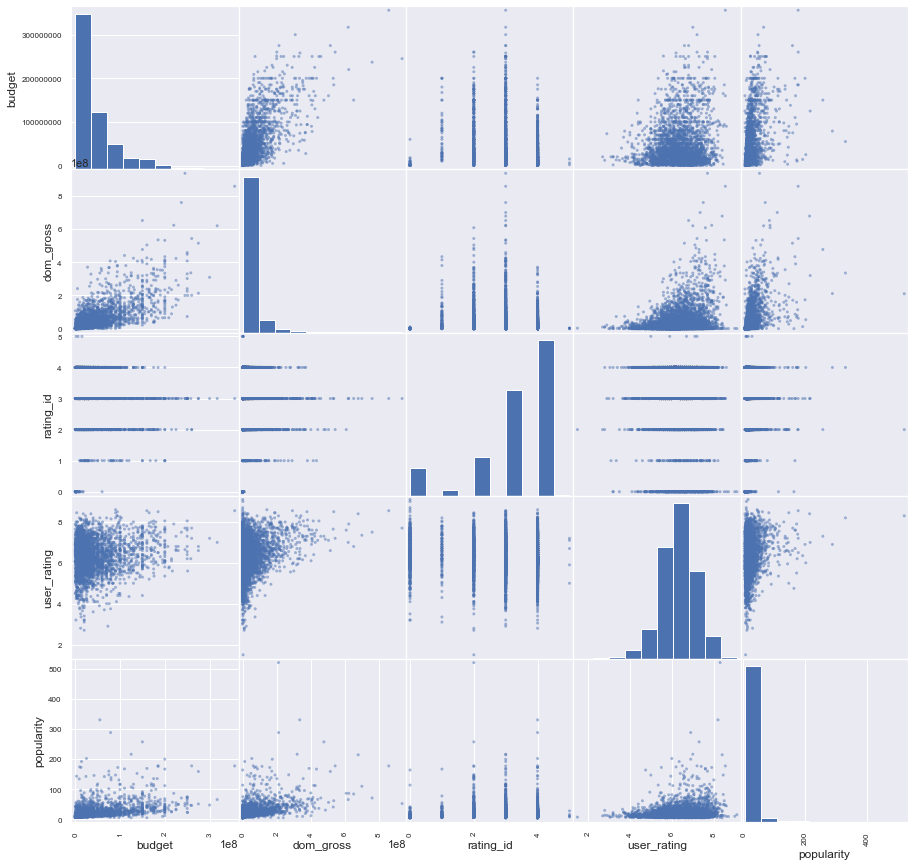

In [198]:
pd.plotting.scatter_matrix(master_movies[['budget', 'dom_gross', 'rating_id', 'user_rating', 'popularity']], figsize=(15, 15));

rating_id  is_franchise  popularity  user_rating  total_votes  \
rating_id             1             0           0           -0            0   
is_franchise          0             1           0            0            0   
popularity            0             0           1            0            0   
user_rating          -0             0           0            1            0   
total_votes           0             0           0            0            1   
budget               -0             0           0            0            0   
dom_gross            -0             0           1            0            1   
world_gross          -0             0           1            0            1   
dom_net              -0             0           0            0            0   
world_net            -0             0           1            0            0   

              budget  dom_gross  world_gross  dom_net  world_net  
rating_id         -0         -0           -0       -0         -0  
is_franchise       0          0            0        0          0  
popularity         0          1            1        0          1  
user_rating        0          0            0        0          0  
total_votes        0          1            1        0          0  
budget             1          1            1        0          1  
dom_gross          1          1            1        1          1  
world_gross        1          1            1        1          1  
dom_net            0          1            1        1          1  
world_net          1          1            1        1          1

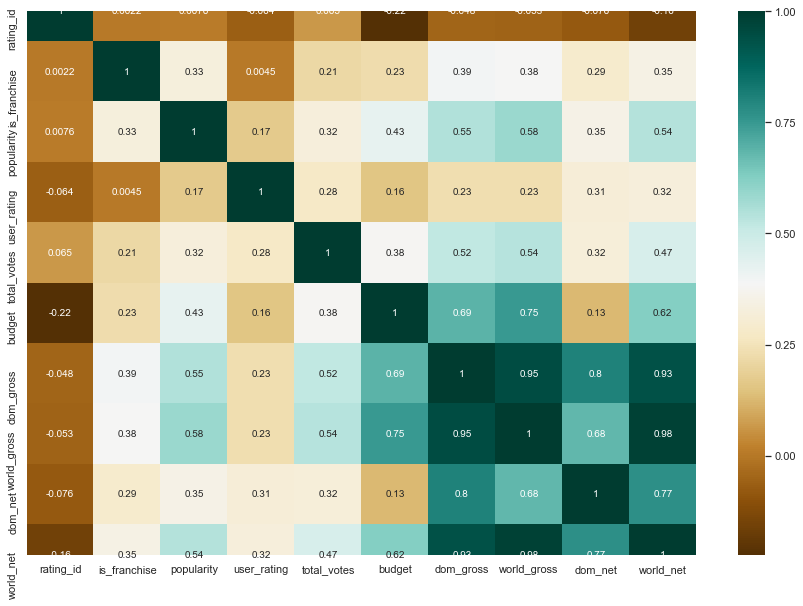

In [199]:
plt.figure(figsize=(15,10))
c= master_movies.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

### Correlation Observtions
Observations from scatter plot and heat map

* user rating seems to have no correlation with how well the movie does
* budget has some correlation with gross/net. Which makes sense.
* budget has nearly no correlation with NET. That seems weird.
* a movie's popularity has only minor correlation with gross/net

In [200]:
master_movies.sort_values('dom_gross', ascending=False).head(30)
# top 30 grossing movies, domestic

title mpaa_rating  rating_id  \
id                                                                           
tt2488496               Star Wars The Force Awakens       PG-13          3   
tt4154796                          Avengers Endgame       PG-13          3   
tt0499549                                    Avatar       PG-13          3   
tt1825683                             Black Panther       PG-13          3   
tt4154756                     Avengers Infinity War       PG-13          3   
tt0369610                            Jurassic World       PG-13          3   
tt0848228                              The Avengers       PG-13          3   
tt2527336                   Star Wars The Last Jedi       PG-13          3   
tt3606756                             Incredibles 2          PG          2   
tt6105098                             The Lion King          PG          2   
tt0468569                           The Dark Knight       PG-13          3   
tt3748528               Rogue One A Star Wars Story       PG-13          3   
tt2527338           Star Wars The Rise of Skywalker       PG-13          3   
tt2771200                      Beauty and the Beast          PG          2   
tt2277860                              Finding Dory          PG          2   
tt4520988                                 Frozen II          PG          2   
tt2395427                    Avengers Age of Ultron       PG-13          3   
tt1345836                     The Dark Knight Rises       PG-13          3   
tt0298148                                   Shrek 2          PG          2   
tt1979376                               Toy Story 4           G          1   
tt4154664                            Captain Marvel       PG-13          3   
tt1951264            The Hunger Games Catching Fire       PG-13          3   
tt0383574  Pirates of the Caribbean Dead Mans Chest       PG-13          3   
tt4881806             Jurassic World Fallen Kingdom       PG-13          3   
tt0435761                               Toy Story 3           G          1   
tt0451279                              Wonder Woman       PG-13          3   
tt1300854                                Iron Man 3       PG-13          3   
tt3498820                 Captain America Civil War       PG-13          3   
tt1392170                          The Hunger Games       PG-13          3   
tt0145487                                 SpiderMan       PG-13          3   

          release_date                   genres  \
id                                                
tt2488496   2015-12-15        [28, 12, 878, 14]   
tt4154796   2019-04-24            [12, 878, 28]   
tt0499549   2009-12-10        [28, 12, 14, 878]   
tt1825683   2018-02-13        [28, 12, 14, 878]   
tt4154756   2018-04-25            [12, 28, 878]   
tt0369610   2015-06-06        [28, 12, 878, 53]   
tt0848228   2012-04-25            [878, 28, 12]   
tt2527336   2017-12-13            [28, 12, 878]   
tt3606756   2018-06-14      [28, 12, 16, 10751]   
tt6105098   2019-07-12   [12, 10751, 10402, 16]   
tt0468569   2008-07-16         [18, 28, 80, 53]   
tt3748528   2016-12-14            [28, 12, 878]   
tt2527338   2019-12-18            [28, 12, 878]   
tt2771200   2017-03-16       [10751, 14, 10749]   
tt2277860   2016-06-16      [12, 16, 35, 10751]   
tt4520988   2019-11-20  [16, 10751, 12, 35, 14]   
tt2395427   2015-04-22            [28, 12, 878]   
tt1345836   2012-07-16         [28, 80, 18, 53]   
tt0298148   2004-05-19  [16, 10751, 35, 14, 12]   
tt1979376   2019-06-19  [12, 16, 35, 10751, 14]   
tt4154664   2019-03-06            [28, 12, 878]   
tt1951264   2013-11-15            [28, 12, 878]   
tt0383574   2006-07-06             [28, 12, 14]   
tt4881806   2018-06-06            [28, 12, 878]   
tt0435761   2010-06-16          [16, 10751, 35]   
tt0451279   2017-05-30             [28, 12, 14]   
tt1300854   2013-04-18            [28, 12, 878]   
tt3498820   2016-04-27            [12, 28, 878]   
tt1392170   2012-03

In [201]:
master_movies.sort_values('dom_net', ascending=False).head(10)

title mpaa_rating  rating_id release_date  \
id                                                                           
tt2488496  Star Wars The Force Awakens       PG-13          3   2015-12-15   
tt0499549                       Avatar       PG-13          3   2009-12-10   
tt4154796             Avengers Endgame       PG-13          3   2019-04-24   
tt0369610               Jurassic World       PG-13          3   2015-06-06   
tt0848228                 The Avengers       PG-13          3   2012-04-25   
tt0468569              The Dark Knight       PG-13          3   2008-07-16   
tt2771200         Beauty and the Beast          PG          2   2017-03-16   
tt0335345    The Passion of the Christ           R          4   2004-02-25   
tt3748528  Rogue One A Star Wars Story       PG-13          3   2016-12-14   
tt0298148                      Shrek 2          PG          2   2004-05-19   

                            genres                               studio  \
id                                                                        
tt2488496        [28, 12, 878, 14]  Walt Disney Studios Motion Pictures   
tt0499549        [28, 12, 14, 878]                Twentieth Century Fox   
tt4154796            [12, 878, 28]  Walt Disney Studios Motion Pictures   
tt0369610        [28, 12, 878, 53]                   Universal Pictures   
tt0848228            [878, 28, 12]  Walt Disney Studios Motion Pictures   
tt0468569         [18, 28, 80, 53]                         Warner Bros.   
tt2771200       [10751, 14, 10749]  Walt Disney Studios Motion Pictures   
tt0335345                     [18]                      Newmarket Films   
tt3748528            [28, 12, 878]  Walt Disney Studios Motion Pictures   
tt0298148  [16, 10751, 35, 14, 12]              DreamWorks Distribution   

                           franchise  is_franchise  popularity  user_rating  \
id                                                                            
tt2488496                        NaN         False          52            8   
tt0499549                     Avatar          True          71            8   
tt4154796  Marvel Cinematic Universe          True         177            9   
tt0369610              Jurassic Park          True          84            7   
tt0848228  Marvel Cinematic Universe          True          86            8   
tt0468569                     Batman          True          62            8   
tt2771200                        NaN         False          56            7   
tt0335345                        NaN         False          39            7   
tt3748528                  Star Wars          True          41            8   
tt0298148                      Shrek          True          66            7   

           total_votes    budget  dom_gross  world_gross   dom_net  world_net  
id                                                                             
tt2488496       799850 245000000  936662225   2068454133 691662225 1823454133  
tt0499549        22270 237000000  760507625   2790439092 523507625 2553439092  
tt4154796       456667 356000000  858373000   2797800564 502373000 2441800564  
tt0369610       555492 150000000  652270625   1670401444 502270625 1520401444  
tt0848228      1207036 220000000  623357910   1518815515 403357910 1298815515  
tt0468569        23590 185000000  535234033   1005456758 350234033  820456758  
tt2771200       251238 160000000  504481165   1264064386 344481165 1104064386  
tt0335345         2652  27500000  370782930    617198176 343282930  589698176  
tt3748528       490033 200000000  532177324   1056057720 332177324  856057720  
tt0298148         8186 110000000  441226247    932884451 331226247  822884451

In [202]:
Q1 = master_movies.quantile(0.25)
Q3 = master_movies.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

rating_id              1
is_franchise           0
popularity            10
user_rating            1
total_votes        26933
budget          47000000
dom_gross       42417290
world_gross     79783997
dom_net         39201866
world_net      103028857
dtype: float64


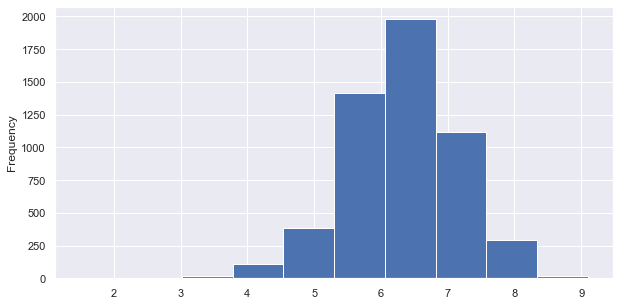

In [203]:
master_movies['user_rating'].plot(kind='hist', figsize=(10,5));

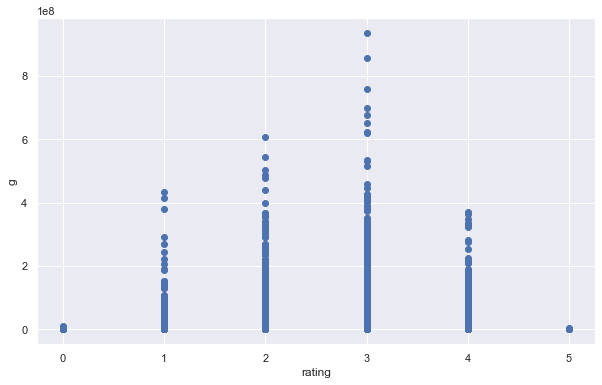

In [204]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(master_movies['rating_id'], master_movies['dom_gross'])
ax.set_xlabel('rating')
ax.set_ylabel('g')
plt.show()

## Franchises

In [205]:
franchiseinfo = master_movies.groupby('is_franchise')
franchiseinfo.count()
# 631 franchise films on the list, 4702 non-franchises

title  mpaa_rating  rating_id  release_date  genres  studio  \
is_franchise                                                                
False          4702         4702       4702          4702    4702    4616   
True            631          631        631           631     631     630   

              franchise  popularity  user_rating  total_votes  budget  \
is_franchise                                                            
False                 0        4702         4702         4702    2307   
True                631         631          631          631     537   

              dom_gross  world_gross  dom_net  world_net  
is_franchise                                              
False              4702         4702     2307       2307  
True                631          631      537        537

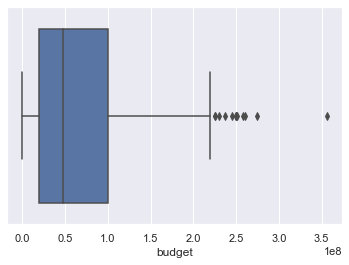

In [206]:
isfranchises = master_movies.loc[(master_movies['is_franchise'] == True)]
isfranchises
sns.boxplot(x=isfranchises['budget']);

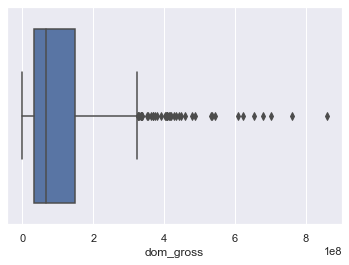

In [207]:
isfranchises = master_movies.loc[(master_movies['is_franchise'] == True)]
isfranchises
sns.boxplot(x=isfranchises['dom_gross']);

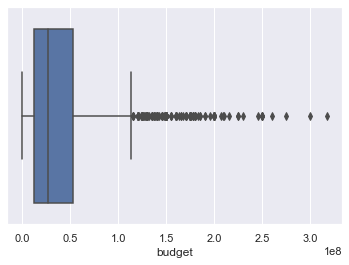

In [208]:
notfranchises = master_movies.loc[(master_movies['is_franchise'] == False)]
notfranchises
sns.boxplot(x=notfranchises['budget']);

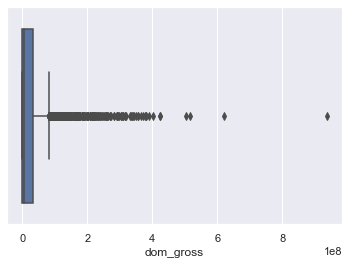

In [209]:
notfranchises = master_movies.loc[(master_movies['is_franchise'] == False)]
notfranchises
sns.boxplot(x=notfranchises['dom_gross']);

In [210]:
franchiseinfo.mean()

rating_id  popularity  user_rating  total_votes   budget  \
is_franchise                                                             
False                 3          17            6        32947 40778730   
True                  3          37            6       103275 68875808   

              dom_gross  world_gross  dom_net  world_net  
is_franchise                                              
False          26504690     58026718  6482944   61415750  
True          110686745    275124145 50120075  225458318

On average - franchise films are more popular than non-franchise. Non-franchise also gross and net significantly less on average, but on the flip side, they cost less to make.
User rating of franchise and non franchise films is nearly equal, however franchise films are more popular.

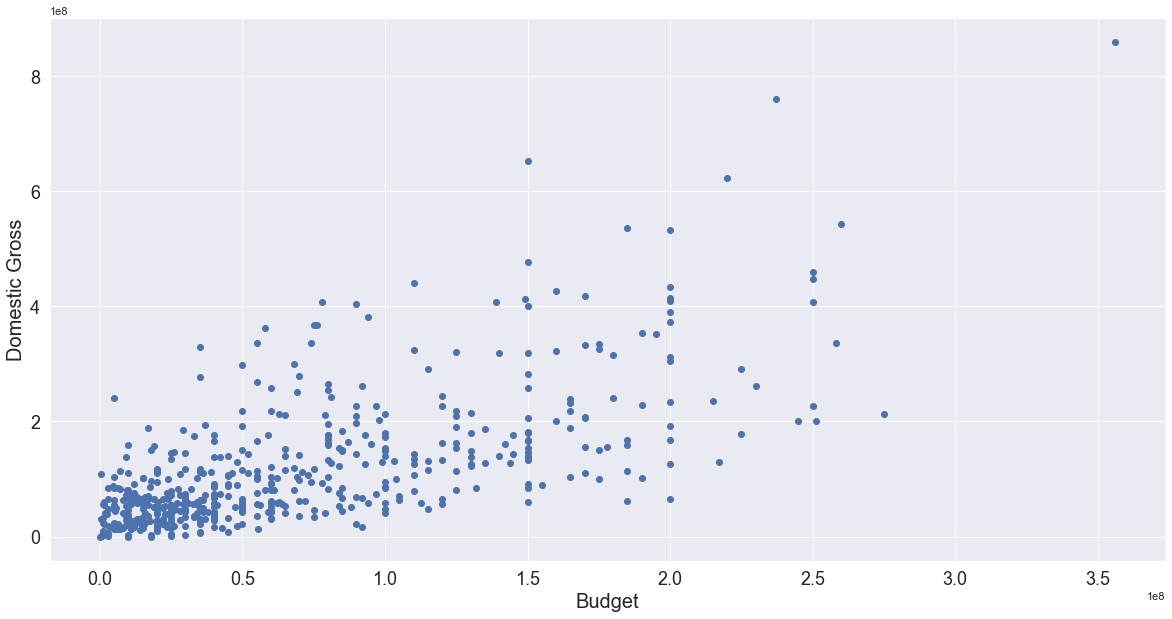

In [264]:
# Use plot() function to create a plot using above values on both x and y coordinates. Add a label.
#plt.plot(franchises['budget'], franchises['dom_gross'], label='Sample Data')

# Add labels for x and y axes
#plt.xlabel('X Axis Label')
#plt.ylabel('Y Axis Label')

# Add a title for the plot
#plt.title('PLOT TITLE')

# Add a legend to the plot with legend() in lower right corner
#plt.legend(loc=4)

# Output the final plot
#plt.show()
from scipy.stats import linregress

x = isfranchises['budget']
y = isfranchises['dom_gross']
z = isfranchises['popularity']

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

# Change the default figure size
plt.figure(figsize=(20,10))

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
plt.xlabel("Budget", fontsize=20)
plt.ylabel("Domestic Gross", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.scatter(x, y)
plt.plot(x, m * x + b, color="red")
plt.show();

## MPAA Rating

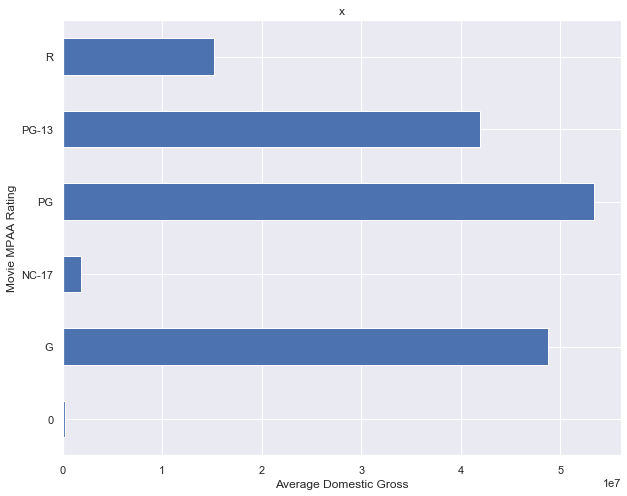

In [211]:
# Perform an Exploration of dom gross by rating
to_plot = notfranchises.groupby('mpaa_rating').dom_gross.mean()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('Movie MPAA Rating')
plt.xlabel('Average Domestic Gross')
plt.title('x');

## Studios

In [212]:
master_movies.groupby('studio').mean().sort_values('dom_gross', ascending=False)
# sorting by average dom_gross, we see our top performing studios which produce the biggest blockbusters on average

# 344 studios made our 6749 movies

rating_id  is_franchise  popularity  \
studio                                                                     
Walt Disney Studios Motion Pictures          2             0          33   
DreamWorks                                   3             0          23   
Sony Pictures Entertainment (SPE)            3             0          28   
Warner Bros.                                 3             0          28   
Universal Pictures                           3             0          27   
...                                        ...           ...         ...   
Blackrock Films                              0             0          12   
FilmBuff                                     0             0          11   
Swen Releasing                               3             0          14   
Keystone Entertainment Inc.                  4             0           6   
Netflix                                      4             0          38   

                                     user_rating  total_votes    budget  \
studio                                                                    
Walt Disney Studios Motion Pictures            7        95633  93979176   
DreamWorks                                     6        57799 102227273   
Sony Pictures Entertainment (SPE)              6        67805  65846744   
Warner Bros.                                   6        85010  65047024   
Universal Pictures                             6        66113  54952178   
...                                          ...          ...       ...   
Blackrock Films                                6        18239    135000   
FilmBuff                                       5         1188       nan   
Swen Releasing                                 6         3488       nan   
Keystone Entertainment Inc.                    6           35       nan   
Netflix                                        7       225066  19800000   

                                     dom_gross  world_gross   dom_net  \
studio                                                                  
Walt Disney Studios Motion Pictures  130791452    314844055  44223193   
DreamWorks                           121314502    302963428  30705334   
Sony Pictures Entertainment (SPE)     77946445    184326627  16436611   
Warner Bros.                          75062310    177792969  14172990   
Universal Pictures                    74524860    173801135  23593499   
...                                        ...          ...       ...   
Blackrock Films                           1532         1532   -133468   
FilmBuff                                  1469        24083       nan   
Swen Releasing                            1455        61250       nan   
Keystone Entertainment Inc.               1400         1400       nan   
Netflix                                      0            0 -19800000   

                                     world_net  
studio                                          
Walt Disney Studios Motion Pictures  241998362  
DreamWorks                           234707618  
Sony Pictures Entertainment (SPE)    127875015  
Warner Bros.                         118259574  
Universal Pictures                   127876913  
...                                        ...  
Blackrock Films                        -133468  
FilmBuff                                   nan  
Swen Releasing                             nan  
Keystone Entertainment Inc.                nan  
Netflix                              -19800000  

[335 rows x 10 columns]

In [213]:
master_movies.groupby('studio').sum().sort_values('world_gross', ascending=False).head(10)
# sorting on world gross as a sum, we see which studios bring in the most overall gross

rating_id  is_franchise  popularity  \
studio                                                                     
Walt Disney Studios Motion Pictures        596            54        8554   
Warner Bros.                              1324            73       11488   
Twentieth Century Fox                      852            69        8153   
Universal Pictures                        1014            86        8432   
Sony Pictures Entertainment (SPE)          733            59        6623   
Paramount Pictures                         698            42        5347   
Lionsgate                                  949            57        5908   
DreamWorks                                 111             9         901   
New Line Cinema                            286            15        1702   
DreamWorks Distribution                    134             6         953   

                                     user_rating  total_votes      budget  \
studio                                                                      
Walt Disney Studios Motion Pictures         1705     24577703 18889814350   
Warner Bros.                                2632     35024021 21855800000   
Twentieth Century Fox                       1828     20931413 15355950000   
Universal Pictures                          1961     20561237 15771275000   
Sony Pictures Entertainment (SPE)           1466     15934201 14157050000   
Paramount Pictures                          1358     18024484 11996932500   
Lionsgate                                   1732     15070633  5196301691   
DreamWorks                                   253      2254177  3373500000   
New Line Cinema                              531       141190  2679250000   
DreamWorks Distribution                      298       113279  2125700000   

                                      dom_gross  world_gross    dom_net  \
studio                                                                    
Walt Disney Studios Motion Pictures 33613403098  80914922024 8888861788   
Warner Bros.                        30925671782  73250703294 4762124692   
Twentieth Century Fox               21207849084  54658143609 4716060880   
Universal Pictures                  23177231326  54052153036 6771334116   
Sony Pictures Entertainment (SPE)   18317414624  43316757234 3533871442   
Paramount Pictures                  15011916286  32679827491 2568972066   
Lionsgate                            9279514194  19180402046 2285833406   
DreamWorks                           4731265560  11815573682 1013276030   
New Line Cinema                      4334094440   8578264582 1280165559   
DreamWorks Distribution              3278267425   6793326126  871077499   

                                      world_net  
studio                                           
Walt Disney Studios Motion Pictures 48641670752  
Warner Bros.                        39735217024  
Twentieth Century Fox               36580137426  
Universal Pictures                  36700673948  
Sony Pictures Entertainment (SPE)   27493128180  
Paramount Pictures                  19590577481  
Lionsgate                            9974369160  
DreamWorks                           7745351378  
New Line Cinema                      5229438812  
DreamWorks Distribution              3946440644

In [214]:
movies_withbudget.groupby('studio').mean().sort_values('dom_net', ascending=False).head(10)
# sorting on domestic net on average, we get some interesting results. Our big flashy studios are still there,
# but there are some smaller studios that have a very respectable domestic net income per film
# Pantelion films spent $12mil on a single film that ultimately netted $38mil domestic, which is only about $7mil less
# than the average Disney film nets domestically. Now, the WORLDWIDE net differs greatly ($79mil vs Disney's $260mil),
# but overall we can understand that we can get respectable results on a smaller budget if we do it right

rating_id  is_franchise  popularity  \
studio                                                                     
Walt Disney Studios Motion Pictures          2             0          32   
Pantelion Films                              3             0          36   
Newmarket Films                              4             0          19   
United Artists Releasing                     3             0          62   
DreamWorks                                   3             0          24   
Summit Entertainment                         3             0          28   
Universal Pictures                           3             0          28   
TriStar Pictures                             3             0          22   
DreamWorks Distribution                      3             0          21   
The Weinstein Company                        4             0          19   

                                     user_rating  total_votes    budget  \
studio                                                                    
Walt Disney Studios Motion Pictures            7       104318  93979176   
Pantelion Films                                6        26525  12000000   
Newmarket Films                                7        15902  19218750   
United Artists Releasing                       6         7368  15250000   
DreamWorks                                     7        68103 102227273   
Summit Entertainment                           6        89436  37145833   
Universal Pictures                             6        68772  54952178   
TriStar Pictures                               7       101956  26081818   
DreamWorks Distribution                        7         2467  50611905   
The Weinstein Company                          7       159658  24853125   

                                     dom_gross  world_gross  dom_net  \
studio                                                                 
Walt Disney Studios Motion Pictures  138202369    335977538 44223193   
Pantelion Films                       50316123     91244913 38316123   
Newmarket Films                       57112036    103916304 37893286   
United Artists Releasing              47006079     92192568 31756079   
DreamWorks                           132932607    336934890 30705334   
Summit Entertainment                  67518346    159904479 30372513   
Universal Pictures                    78545676    182829090 23593499   
TriStar Pictures                      48174085     90822535 22092267   
DreamWorks Distribution               71351845    144574777 20739940   
The Weinstein Company                 43918239     97976386 19065114   

                                     world_net  
studio                                          
Walt Disney Studios Motion Pictures  241998362  
Pantelion Films                       79244913  
Newmarket Films                       84697554  
United Artists Releasing              76942568  
DreamWorks                           234707618  
Summit Entertainment                 122758646  
Universal Pictures                   127876913  
TriStar Pictures                      64740717  
DreamWorks Distribution               93962872  
The Weinstein Company                 73123261

In [215]:
master_movies['studio'].value_counts()

Warner Bros.                           412
Universal Pictures                     311
Twentieth Century Fox                  295
Lionsgate                              276
Walt Disney Studios Motion Pictures    257
                                      ... 
GVN Releasing                            1
RCR Distribution                         1
1091 Media                               1
Millennium Films, Inc.                   1
RAM Entertainment                        1
Name: studio, Length: 335, dtype: int64

## Studying some cast and crew info

In [216]:
cast_crew.columns

Index(['index', 'title', 'mpaa_rating', 'rating_id', 'release_date', 'genres',
       'studio', 'franchise', 'is_franchise', 'popularity', 'user_rating',
       'total_votes', 'budget', 'dom_gross', 'world_gross', 'dom_net',
       'world_net', 'nconst', 'category', 'primary_name'],
      dtype='object')

In [217]:
cast_crew['category'].unique()
#What kinds of categories are tracked?

array([nan, 'actress', 'writer', 'actor', 'producer', 'director',
       'composer', 'cinematographer', 'editor', 'production_designer',
       'self', 'archive_footage'], dtype=object)

## Director

In [218]:
# make a new series based on the director of the movie
director = cast_crew[cast_crew['category'] == 'director']

In [219]:
# checking out our mean values for this group
director.groupby(['primary_name']).mean().sort_values('dom_net', ascending=False)
# We have 1577 different directors for our movies

rating_id  is_franchise  popularity  user_rating  \
primary_name                                                            
Joss Whedon                  3             1          55            7   
Chris Buck                   2             1         172            7   
Jennifer Lee                 2             1         172            7   
Patty Jenkins                3             1          73            7   
J.J. Abrams                  3             0          64            7   
...                        ...           ...         ...          ...   
Zachary Heinzerling          4             0           9            7   
Zara Hayes                   3             0          17            6   
Zeresenay Mehari             0             0           6            6   
Zillah Bowes                 3             0           9            7   
Éric Warin                   2             0          22            7   

                     total_votes    budget  dom_gross  world_gross   dom_net  \
primary_name                                                                   
Joss Whedon               634991 235000000  362230876    975655425 306181889   
Chris Buck                267916 150000000  439055794   1365415155 289055794   
Jennifer Lee              267916 150000000  439055794   1365415155 289055794   
Patty Jenkins             502894 149000000  412563408    821847012 263563408   
J.J. Abrams               395942 190000000  451911902    967514903 261911902   
...                          ...       ...        ...          ...       ...   
Zachary Heinzerling         4364       nan     200036       200036       nan   
Zara Hayes                   828       nan   13631124     16418218       nan   
Zeresenay Mehari            1157       nan      49667        97205       nan   
Zillah Bowes               14509       nan     252788       607169       nan   
Éric Warin                 17962       nan   24702560    106127278       nan   

                     world_net  
primary_name                    
Joss Whedon         1225812528  
Chris Buck          1215415155  
Jennifer Lee        1215415155  
Patty Jenkins        672847012  
J.J. Abrams          777514903  
...                        ...  
Zachary Heinzerling        nan  
Zara Hayes                 nan  
Zeresenay Mehari           nan  
Zillah Bowes               nan  
Éric Warin                 nan  

[1922 rows x 10 columns]

In [220]:
# Checking how many movies each director has directed.
director.groupby(['primary_name']).count().value_counts('title')
#1015 of our directors have directed only one movie

title
1    1308
2     336
3     168
4      60
5      31
6      11
7       6
8       2
dtype: int64

In [221]:
# select directors that have directed at least 2 movies, so that we know they are proven
#director = director[director.duplicated(subset='primary_name', keep=False)]

# checking out our mean values for this group
director.groupby(['primary_name']).mean().sort_values('dom_net', ascending=False)
# We have 562 repeat directors

rating_id  is_franchise  popularity  user_rating  \
primary_name                                                            
Joss Whedon                  3             1          55            7   
Chris Buck                   2             1         172            7   
Jennifer Lee                 2             1         172            7   
Patty Jenkins                3             1          73            7   
J.J. Abrams                  3             0          64            7   
...                        ...           ...         ...          ...   
Zachary Heinzerling          4             0           9            7   
Zara Hayes                   3             0          17            6   
Zeresenay Mehari             0             0           6            6   
Zillah Bowes                 3             0           9            7   
Éric Warin                   2             0          22            7   

                     total_votes    budget  dom_gross  world_gross   dom_net  \
primary_name                                                                   
Joss Whedon               634991 235000000  362230876    975655425 306181889   
Chris Buck                267916 150000000  439055794   1365415155 289055794   
Jennifer Lee              267916 150000000  439055794   1365415155 289055794   
Patty Jenkins             502894 149000000  412563408    821847012 263563408   
J.J. Abrams               395942 190000000  451911902    967514903 261911902   
...                          ...       ...        ...          ...       ...   
Zachary Heinzerling         4364       nan     200036       200036       nan   
Zara Hayes                   828       nan   13631124     16418218       nan   
Zeresenay Mehari            1157       nan      49667        97205       nan   
Zillah Bowes               14509       nan     252788       607169       nan   
Éric Warin                 17962       nan   24702560    106127278       nan   

                     world_net  
primary_name                    
Joss Whedon         1225812528  
Chris Buck          1215415155  
Jennifer Lee        1215415155  
Patty Jenkins        672847012  
J.J. Abrams          777514903  
...                        ...  
Zachary Heinzerling        nan  
Zara Hayes                 nan  
Zeresenay Mehari           nan  
Zillah Bowes               nan  
Éric Warin                 nan  

[1922 rows x 10 columns]

In [222]:
# Looking at the mean domestic gross of our top 30 directors
directortop30 = director.groupby(['primary_name'])['dom_gross'].mean().sort_values(ascending=False).nlargest(30)
directortop30

primary_name
Joe Russo              551259851
Anthony Russo          551259851
Angus MacLane          486295561
J.J. Abrams            451911902
Jennifer Lee           439055794
Chris Buck             439055794
Josh Cooley            434038008
Patty Jenkins          412563408
Joss Whedon            362230876
Pete Docter            356921711
Ronnie Del Carmen      356921711
Jared Bush             341268248
Jon Favreau            330078262
Yarrow Cheney          319502640
Lee Unkrich            312732448
Brad Bird              303805323
David Slade            300531751
Pierre Coffin          294734557
Rian Johnson           284010274
Andrew Stanton         279686830
Christopher Nolan      279618729
Ryan Coogler           275431829
Alfonso Cuarón         274092705
Chris Renaud           272173719
Kyle Balda             271566857
Byron Howard           271045092
Scott Mosier           270620950
Garth Jennings         270395425
Christophe Lourdelet   270395425
Dan Scanlon            2684927

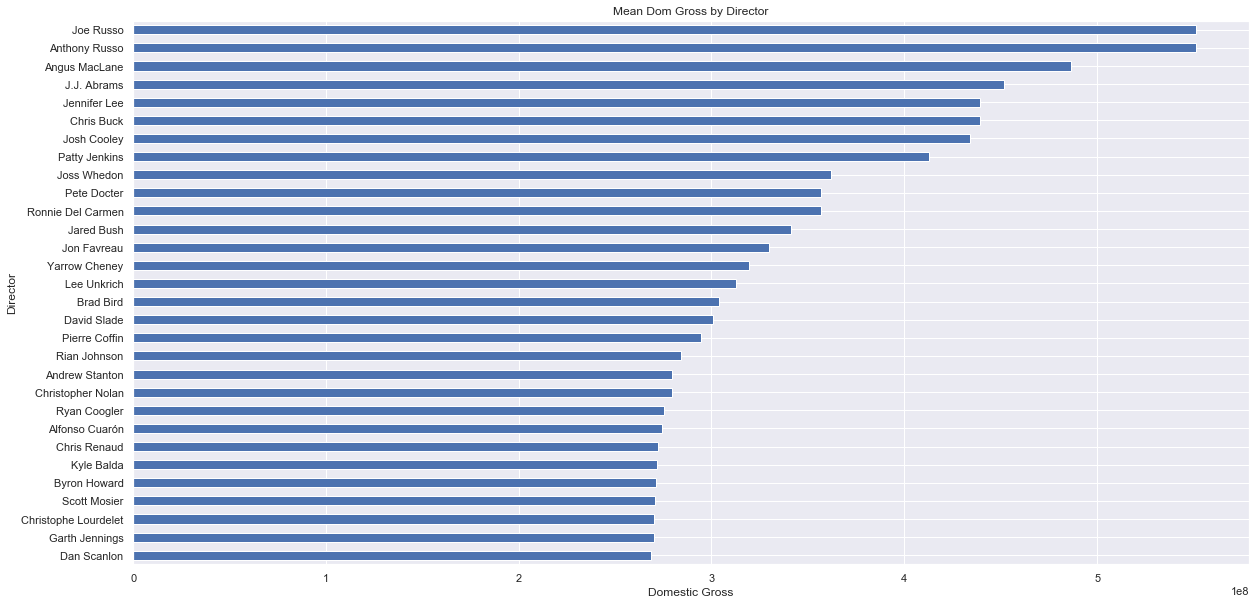

In [223]:
# Bar graph of the domestic gross of our top 30 directors
graphit = directortop30.sort_values().plot(kind='barh', figsize=(20,10))

plt.title('Mean Dom Gross by Director')
plt.xlabel('Domestic Gross')
plt.ylabel('Director')
graphit.plot();

## Actor

In [224]:
# checking out the actors in our top 30 grossing movies
actor = cast_crew[cast_crew['category'] == 'actor']
actor30 = actor.groupby(['primary_name'])['dom_gross'].max().sort_values(ascending=False).nlargest(30)
actor30

primary_name
Oscar Isaac         936662225
Domhnall Gleeson    936662225
John Boyega         936662225
Robert Downey Jr.   858373000
Mark Ruffalo        858373000
Chris Evans         858373000
Chris Hemsworth     858373000
Chadwick Boseman    700426566
Michael B. Jordan   700426566
Chris Pratt         652270625
Ty Simpkins         652270625
Jeremy Renner       623357910
Mark Hamill         620181382
Craig T. Nelson     608581744
Huck Milner         608581744
Chiwetel Ejiofor    543638043
James Earl Jones    543638043
Donald Glover       543638043
Seth Rogen          543638043
Donnie Yen          532177324
Alan Tudyk          532177324
Diego Luna          532177324
Adam Driver         515202542
Josh Gad            504481165
Dan Stevens         504481165
Luke Evans          504481165
Ed O'Neill          486295561
Albert Brooks       486295561
Jonathan Groff      477373578
Sterling K. Brown   477373578
Name: dom_gross, dtype: float64

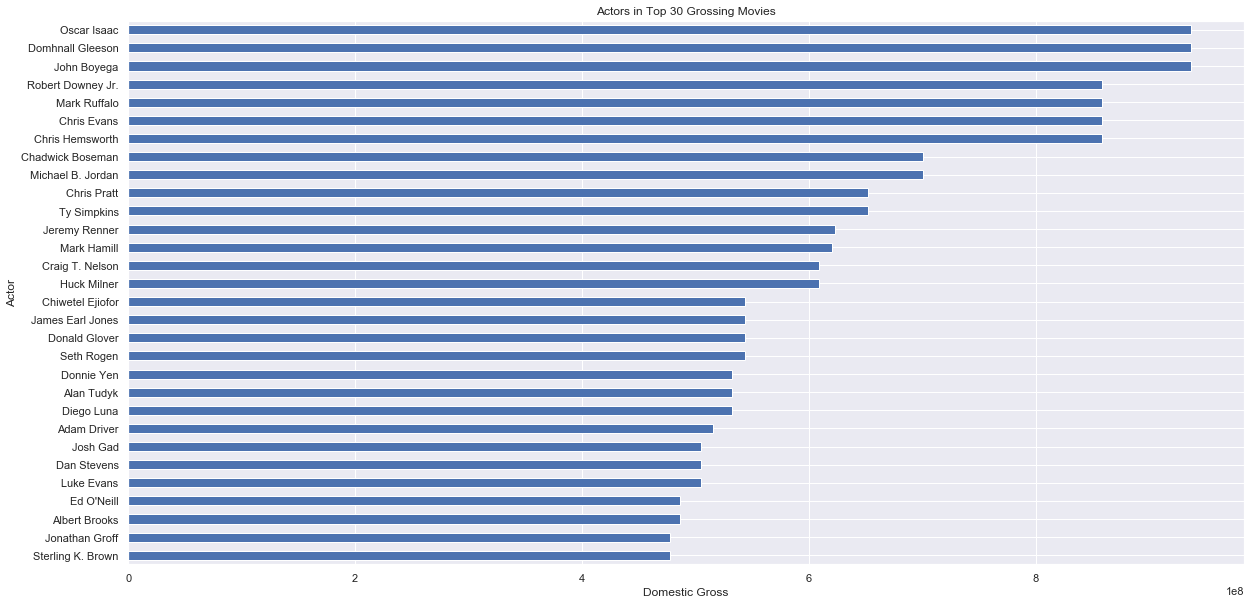

In [225]:
# Your code here
graphit = actor30.sort_values().plot(kind='barh', figsize=(20,10))

plt.title('Actors in Top 30 Grossing Movies')
plt.xlabel('Domestic Gross')
plt.ylabel('Actor')
graphit.plot();

In [226]:
# Looking at the mean domestic gross of the actors
actormean = actor.groupby(['primary_name'])['dom_gross'].mean().sort_values(ascending=False).nlargest(30)
actormean

primary_name
Huck Milner         608581744
Craig T. Nelson     608581744
Ed O'Neill          486295561
Donald Glover       378702778
Robert Downey Jr.   370767994
Neel Sethi          364001123
Marwan Kenzari      355559216
Mena Massoud        355559216
Ty Simpkins         353139888
Cole Konis          350126372
Pierre Coffin       336045770
Finn Wolfhard       328828874
Jonathan Groff      292722296
Donnie Yen          288537868
John Boyega         275838382
James Earl Jones    272498976
Pharrell Williams   270620950
Bill Skarsgård      270211051
Alan Tudyk          266200581
Trey Parker         264624300
Chris Evans         263849996
Ken Stott           258366855
Temuera Morrison    248757044
Mike Myers          238736787
Jordan Peele        227314930
Benjamin Bratt      223249077
Scott Adsit         222527828
Gwilym Lee          216668042
Ben Hardy           216668042
David Schwimmer     216391482
Name: dom_gross, dtype: float64

## Actress

In [227]:
# checking out the actresses in our top 30 grossing movies
actress = cast_crew[cast_crew['category'] == 'actress']
actress30 = actress.groupby(['primary_name'])['dom_gross'].max().sort_values(ascending=False).nlargest(30)
actress30

primary_name
Daisy Ridley          936662225
Danai Gurira          700426566
Lupita Nyong'o        700426566
Bryce Dallas Howard   652270625
Judy Greer            652270625
Scarlett Johansson    623357910
Sarah Vowell          608581744
Holly Hunter          608581744
Felicity Jones        532177324
Billie Lourd          515202542
Emma Watson           504481165
Ellen DeGeneres       486295561
Kaitlin Olson         486295561
Kristen Bell          477373578
Evan Rachel Wood      477373578
Anne Hathaway         448139099
Christina Hendricks   434038008
Brie Larson           426829839
Jennifer Lawrence     424668047
Joan Cusack           415004880
Gal Gadot             412563408
Robin Wright          412563408
Lucy Davis            412563408
Gwyneth Paltrow       409013994
Karen Gillan          404540171
Idina Menzel          400738009
Zendaya               390532085
Angourie Rice         390532085
Zoe Saldana           389813101
Lake Bell             368384330
Name: dom_gross, dtype: flo

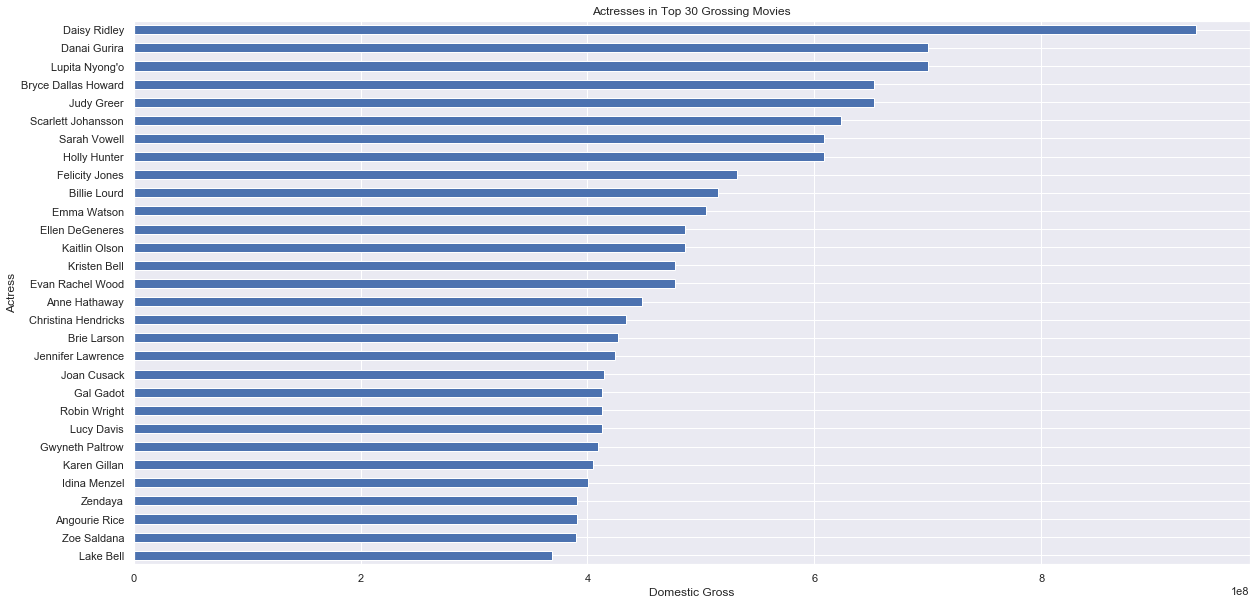

In [228]:
# Your code here
graphit = actress30.sort_values().plot(kind='barh', figsize=(20,10))

plt.title('Actresses in Top 30 Grossing Movies')
plt.xlabel('Domestic Gross')
plt.ylabel('Actress')
graphit.plot();

## Writer

In [229]:
# make a new series based on the writer of the movie
writer = cast_crew[cast_crew['category'] == 'writer']

In [230]:
# checking out our mean values for this group
writer.groupby(['primary_name']).mean().sort_values('dom_net', ascending=False)
# We have 3983 different writers for our list of 6729 movies

rating_id  is_franchise  popularity  user_rating  \
primary_name                                                           
Stephen Chbosky             2             0          56            7   
John Knoll                  3             1          41            8   
Lawrence Kasdan             3             0          52            7   
Chris Van Allsburg          3             1          60            7   
George Lucas                3             0          64            7   
...                       ...           ...         ...          ...   
Zach Dean                   4             0          16            6   
Zach Smith                  3             0          29            5   
Zack Kahn                   4             0          32            7   
Zeb Wells                   4             0          12            5   
Zoe Kazan                   3             0          13            7   

                    total_votes    budget  dom_gross  world_gross   dom_net  \
primary_name                                                                  
Stephen Chbosky          251238 160000000  504481165   1264064386 344481165   
John Knoll               490033 200000000  532177324   1056057720 332177324   
Lawrence Kasdan          515904 260000000  575214868   1230689470 315214868   
Chris Van Allsburg       252638  90000000  404540171    962102237 314540171   
George Lucas             335217 262400000  471736761    989646977 301198197   
...                         ...       ...        ...          ...       ...   
Zach Dean                 36924       nan      66351      1946254       nan   
Zach Smith                 3640       nan    4719928      4873825       nan   
Zack Kahn                 23201       nan      20369       176288       nan   
Zeb Wells                  4506       nan     157768       157768       nan   
Zoe Kazan                 14512       nan    1050616      3321367       nan   

                    world_net  
primary_name                   
Stephen Chbosky    1104064386  
John Knoll          856057720  
Lawrence Kasdan     970689470  
Chris Van Allsburg  872102237  
George Lucas        922455681  
...                       ...  
Zach Dean                 nan  
Zach Smith                nan  
Zack Kahn                 nan  
Zeb Wells                 nan  
Zoe Kazan                 nan  

[2868 rows x 10 columns]

In [231]:
# Checking how many movies each writer has written.
writer.groupby(['primary_name']).count().value_counts('title')
# most of our writers have only written one movie!

title
1    2212
2     361
3     154
4      70
5      37
6      19
7       7
8       5
9       3
dtype: int64

In [232]:
# Looking at the mean domestic gross of our top 30 writers
writertop30 = writer.groupby(['primary_name'])['dom_gross'].mean().sort_values(ascending=False).nlargest(30)
writertop30

primary_name
Joe Robert Cole      700426566
Lawrence Kasdan      575214868
Brenda Chapman       543638043
John Knoll           532177324
Stephen Chbosky      504481165
Victoria Strouse     486295561
George Lucas         471736761
Colin Trevorrow      466461151
Rashida Jones        434038008
Valerie LaPointe     434038008
Andrew Stanton       424521444
Jim Starlin          424409484
Allan Heinberg       412563408
Chris Van Allsburg   404540171
Shane Morris         400738009
Steve Gan            389813101
Steve Englehart      389813101
Zak Penn             380524041
Michael Arndt        375310989
Justin Marks         364001123
Suzanne Collins      362884632
Dan Abnett           361494850
Andy Lanning         361494850
Josh Cooley          356921711
Simon Rich           356921711
Jim DeFelice         350126372
Scott McEwen         350126372
Christopher Markus   342789786
Stephen McFeely      342789786
Geoff Johns          335061807
Name: dom_gross, dtype: float64

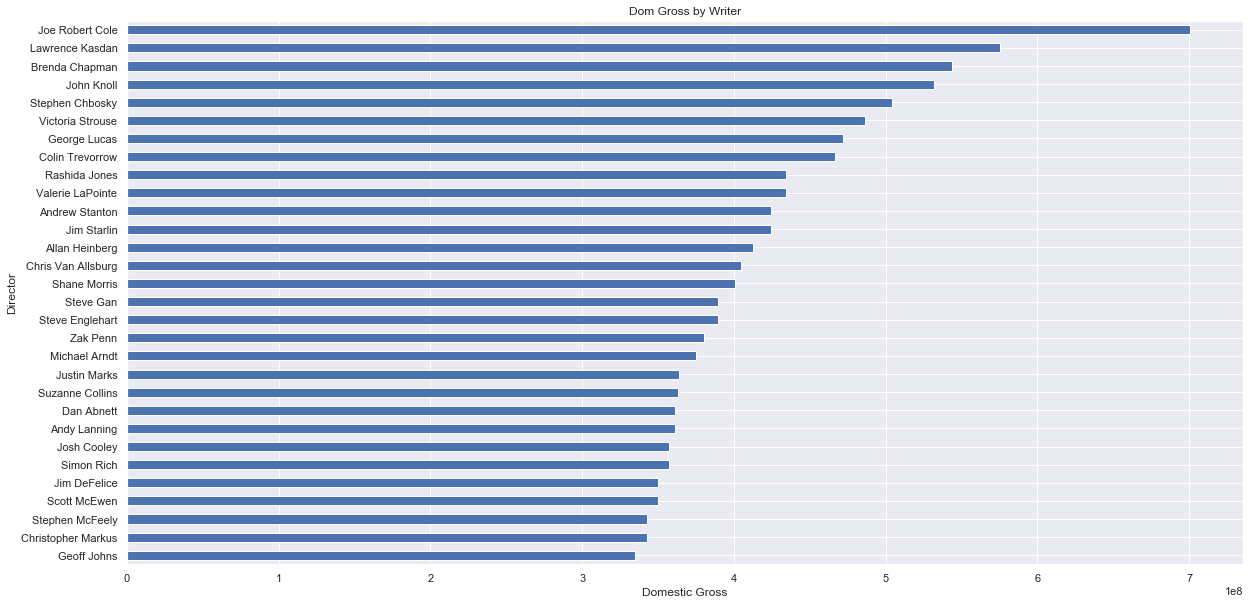

In [233]:
# Bar graph of the domestic gross of our top 30 directors
graphit = writertop30.sort_values().plot(kind='barh', figsize=(20,10))
#deaths = df.groupby(['State'])['Deaths'].sum().sort_values().plot(kind='barh', figsize=(20,10))

plt.title('Dom Gross by Writer')
plt.xlabel('Domestic Gross')
plt.ylabel('Director')
graphit.plot();

In [234]:
master_movies.sort_values('dom_gross', ascending=False).head(50)

title mpaa_rating  \
id                                                                    
tt2488496                   Star Wars The Force Awakens       PG-13   
tt4154796                              Avengers Endgame       PG-13   
tt0499549                                        Avatar       PG-13   
tt1825683                                 Black Panther       PG-13   
tt4154756                         Avengers Infinity War       PG-13   
tt0369610                                Jurassic World       PG-13   
tt0848228                                  The Avengers       PG-13   
tt2527336                       Star Wars The Last Jedi       PG-13   
tt3606756                                 Incredibles 2          PG   
tt6105098                                 The Lion King          PG   
tt0468569                               The Dark Knight       PG-13   
tt3748528                   Rogue One A Star Wars Story       PG-13   
tt2527338               Star Wars The Rise of Skywalker       PG-13   
tt2771200                          Beauty and the Beast          PG   
tt2277860                                  Finding Dory          PG   
tt4520988                                     Frozen II          PG   
tt2395427                        Avengers Age of Ultron       PG-13   
tt1345836                         The Dark Knight Rises       PG-13   
tt0298148                                       Shrek 2          PG   
tt1979376                                   Toy Story 4           G   
tt4154664                                Captain Marvel       PG-13   
tt1951264                The Hunger Games Catching Fire       PG-13   
tt0383574      Pirates of the Caribbean Dead Mans Chest       PG-13   
tt4881806                 Jurassic World Fallen Kingdom       PG-13   
tt0435761                                   Toy Story 3           G   
tt0451279                                  Wonder Woman       PG-13   
tt1300854                                    Iron Man 3       PG-13   
tt3498820                     Captain America Civil War       PG-13   
tt1392170                              The Hunger Games       PG-13   
tt0145487                                     SpiderMan       PG-13   
tt2283362                 Jumanji Welcome to the Jungle       PG-13   
tt1055369            Transformers Revenge of the Fallen       PG-13   
tt2294629                                        Frozen          PG   
tt6320628                       SpiderMan Far from Home       PG-13   
tt3896198                 Guardians of the Galaxy Vol 2       PG-13   
tt1201607   Harry Potter and the Deathly Hallows Part 2       PG-13   
tt0266543                                  Finding Nemo           G   
tt0121766     Star Wars Episode III Revenge of the Sith       PG-13   
tt0167260  The Lord of the Rings The Return of the King       PG-13   
tt0316654                                   SpiderMan 2       PG-13   
tt0335345                     The Passion of the Christ           R   
tt2709768                       The Secret Life of Pets          PG   
tt1690953                               Despicable Me 2          PG   
tt3040964                               The Jungle Book          PG   
tt1431045                                      Deadpool           R   
tt2096673                                    Inside Out          PG   
tt6139732                                       Aladdin          PG   
tt2820852                                     Furious 7       PG-13   
tt1399103                 Transformers Dark of the Moon       PG-13   
tt2179136                               American Sniper           R   

           rating_id release_date                   genres  \
id                                                           
tt2488496          3   2015-12-15        [28, 12, 878, 14]   
tt4154796          3   2019-04-24            [12, 878, 28]   
tt0499549          3   2009-12-10        [28, 12, 14, 878]   
tt1825683          3   2018-02-13        [28, 1

## Writer/Director Teams

Do we have any writing/directing teams 

In [235]:
# make a new series with only the writing and directing personnel categories for the movie
teams = cast_crew[(cast_crew['category'] == 'writer') | (cast_crew['category'] == 'director')]

teams.loc[teams['category'] == 'writer', 'writers'] = teams['nconst']
teams.loc[teams['category'] == 'director', 'directors'] = teams['nconst']

C:\Users\thren\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\thren\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [236]:
teams.sort_values('index', ascending=False)

index                            title mpaa_rating  rating_id  \
30382  tt9896916            The Pilgrims Progress          PG          2   
30378  tt9896916            The Pilgrims Progress          PG          2   
30372  tt9617716            Everybodys Everything           0          0   
30370  tt9617716            Everybodys Everything           0          0   
30367  tt9617456                         For Sama           0          0   
...          ...                              ...         ...        ...   
1046   tt0365907      A Walk Among the Tombstones           R          4   
1045   tt0365907      A Walk Among the Tombstones           R          4   
980    tt0359950  The Secret Life of Walter Mitty          PG          2   
867    tt0337692                      On the Road           R          4   
861    tt0337692                      On the Road           R          4   

      release_date              genres                 studio franchise  \
30382   2019-04-18            [12, 16]          Fathom Events       NaN   
30378   2019-04-18            [12, 16]          Fathom Events       NaN   
30372   2019-11-12                [99]        Gunpowder & Sky       NaN   
30370   2019-11-12                [99]        Gunpowder & Sky       NaN   
30367   2019-10-09         [99, 10752]       PBS Distribution       NaN   
...            ...                 ...                    ...       ...   
1046    2014-09-18  [80, 18, 9648, 53]     Universal Pictures       NaN   
1045    2014-09-18  [80, 18, 9648, 53]     Universal Pictures       NaN   
980     2013-12-18    [12, 35, 18, 14]  Twentieth Century Fox       NaN   
867     2012-05-22            [12, 18]              IFC Films       NaN   
861     2012-05-22            [12, 18]              IFC Films       NaN   

       is_franchise  popularity  ...   budget  dom_gross  world_gross  \
30382         False          75  ...      nan    1294596      3173282   
30378         False          75  ...      nan    1294596      3173282   
30372         False          15  ...      nan     547207       748539   
30370         False          15  ...      nan     547207       748539   
30367         False          10  ...      nan      43796      1397546   
...             ...         ...  ...      ...        ...          ...   
1046          False          31  ... 28000000   26307600     58834384   
1045          False          31  ... 28000000   26307600     58834384   
980           False          16  ... 90000000   58236838    188133322   
867           False          13  ...      nan     744296      9617377   
861           False          13  ...      nan     744296      9617377   

        dom_net  world_net      nconst  category      primary_name  \
30382       nan        nan  nm10567937    writer       John Bunyan   
30378       nan        nan   nm9546685  director  Robert Fernandez   
30372       nan        nan   nm5385537  director      Ramez Silyan   
30370       nan        nan   nm3758612  director   Sebastian Jones   
30367       nan        nan   nm3117666  director      Edward Watts   
...         ...        ...         ...       ...               ...   
1046   -1692400   30834384   nm0088747    writer    Lawrence Block   
1045   -1692400   30834384   nm0291082  director       Scott Frank   
980   -31763162   98133322   nm0175726    writer      Steve Conrad   
867         nan        nan   nm0758574  director     Walter Salles   
861         nan        nan   nm1433580    writer       Jose Rivera   

          writers  directors  
30382  nm10567937        NaN  
30378         NaN  nm9546685  
30372         NaN  nm5385537  
30370         NaN  nm3758612  
30367         NaN  nm3117666  
...           ...        ...  
1046    nm0088747        NaN  
1045          NaN  nm0291082  
980     nm0175726        NaN  
867           NaN  nm0758574  
861     nm1433580        NaN  

[7094 rows x 22 columns]

In [237]:
teams.groupby(['writers', 'directors']).mean()

Empty DataFrame
Columns: [rating_id, is_franchise, popularity, user_rating, total_votes, budget, dom_gross, world_gross, dom_net, world_net]
Index: []

# TO DO

Break out genres, and study numbers vs genre

Study franchises

Look closer into the net income information to give specific examples of smaller movies that were profitable

Visualizations/stuff to look at:
* gross/net of franchise vs non-franchise
* gross/net by genre
* gross/net by genre+franchise status
* gross/net against studio
* check out genres of franchises
* gross/net by MPAA rating
* scatter with directors vs gross where size is how many movies they have directed
* user rating vs franchise and non franchise
* put budget and gross box plots on same graph for franchise and non franchise
* group by rating 
* How many actors/actresses do franchise films have versus non-franchise?
* Who are the top actors in franchise films, vs the top actors in non-franchise films?
* risk vs reward on small movies vs franchise
* study successful franchises by smaller studios (twilight? fifty shades?)
    * see a visualization or list of lowest budget films with at least three franchise entries and check out net

Do all of the functions have docstrings?
Did I follow PEP8?

# Presentation Notes

* Show risk vs reward of franchise investment vs single film. Show Disney avg net per film vs small studio
* Example - Twilight
* Additional revenues from merchandising
* Minecraft? Perfect intersection of franchise and existing IP that MS already owns?

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

dataframe = pd.read_csv("scottish_hills.csv")

x = dataframe.Height
y = dataframe.Latitude

stats = linregress(x, y)

m = stats.slope
b = stats.intercept

# Change the default figure size
plt.figure(figsize=(10,10))

# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')

# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)

# Add x and y lables, and set their font size
plt.xlabel("Height (m)", fontsize=20)
plt.ylabel("Latitude", fontsize=20)

# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.savefig("python-linear-reg-custom.png")

FileNotFoundError: [Errno 2] No such file or directory: 'scottish_hills.csv'